### **AUTOMOTIVE PREDICTOR**

#### **Life cycle of Machine learning Project**  

- Understanding the Problem Statement

- Data Collection 

- Data Checks to perform

- Exploratory data analysis

- Data Pre-Processing

- Model Training

- Choose best mode

## **Business Intelligence and Business Analysis** 
The automotive industry continually strives to enhance vehicle reliability and minimize unexpected breakdowns. Traditional maintenance schedules often fail to account for the unique usage patterns and conditions each vehicle experiences, leading to inefficiencies and potential safety risks.

In the context of automotive components, there is a need for a predictive maintenance system that can anticipate failures and maintenance requirements based on historical data. This project aims to leverage a comprehensive dataset of over 90,000 used cars, spanning from 1970 to 2024, to develop a predictive model that identifies vehicles at high risk of failure. By predicting these maintenance needs, AutoPredict seeks to reduce downtime, optimize maintenance schedules, and ultimately improve vehicle safety and performance.

#### **Problem Statement** 
The challenge is to develop a predictive maintenance model that accurately forecasts automotive component failures using historical car data. This model aims to help in proactively addressing maintenance needs, thereby enhancing vehicle reliability, safety, and operational efficiency.



### **Goals** 
**Predict Failures:** Create a supervised learning model to predict the likelihood of automotive component failures based on features such as age, mileage, engine size, and fuel efficiency.

**Optimize Maintenance:** Use predictive insights to optimize maintenance schedules, reducing unnecessary maintenance actions and preventing unexpected breakdowns.

**Enhance Safety and Performance:** Improve overall vehicle safety and performance by ensuring timely maintenance interventions.



### **Creating a Synthetic Failure Label** 
The dataset does not include a direct feature for predicting failures. To address this, I created a synthetic failure label based on business knowledge and specific parameters. This label was generated using the following criteria:

**Age:** Vehicles older than 10 years are more likely to experience failures.

**Mileage:** Vehicles with mileage greater than 100,000 miles are more prone to maintenance needs.

**Combined Criteria:** Vehicles meeting both the age and mileage thresholds were labeled as likely to fail.



### **Features Included**

**Model:** The model of the car.

**Year:** The manufacturing year of the car.

**Price:** The price of the car.

**Transmission:** The type of transmission used in the car.

**Mileage:** The mileage of the car.

**FuelType:** The type of fuel used by the car.

**Tax:** The tax rate applicable to the car.

**MPG:** The miles per gallon efficiency of the car.

**EngineSize:** The size of the car's engine.

**Manufacturer:** The manufacturer of the car.

### Data collection
**Dataset source:** https://www.kaggle.com/datasets/meruvulikith/90000-cars-data-from-1970-to-2024

The data consists of: 10 columns but we would add 1 more and 97712 rows

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [36]:
df = pd.read_csv("/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/data/CarsData.csv")

### Exploratory data analysis (EDA)

In [37]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [38]:
df.shape

(97712, 10)

In [39]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [41]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

#### **Insights** 

- The dataset has 4 coloumns as object type and we have to OHE (One Hot Encode)
- The dataset has no missing values
- The dataset contains (97712 - rows, 10 coloumns)

### Feature Engineering

##### - Adding new target column named **"fail"** 

In [42]:
# Current year
current_year = datetime.now().year

##### **Note:** Creating the "Fail" Column: The apply function is used to iterate over each row. If a car is older than 10 years or has mileage greater than 100,000 miles, it's labeled as "Yes"; otherwise, it's labeled as "No".

In [43]:
# Add 'Fail' column based on age and mileage criteria
df['Fail'] = df.apply(lambda row: 'Yes' if (current_year - row['year'] > 10 or row['mileage'] > 100000) else 'No', axis=1)

In [44]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,Fail
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi,No
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen,No
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,No
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda,No
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford,No


In [45]:
# Count the occurrences of 'Yes' and 'No' in the 'Fail' column
fail_counts = df['Fail'].value_counts()
print(fail_counts)

Fail
No     92458
Yes     5254
Name: count, dtype: int64


#### **Insights** 
- Now we can clearly see the dataset has variable "No" = 2458, and variable "Yes" = 5254 in our **fail** column.

#### **Note:** 
- Remember we have not yet done One Hot Encoding

In [46]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer', 'Fail'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
 10  Fail          97712 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ MB


##### One Hot Encode all Object column

In [48]:
# Encode categorical variables using pd.get_dummies with dtype to ensure 0 and 1 encoding
categorical_columns = ['model', 'transmission', 'fuelType', 'Manufacturer']
df = pd.get_dummies(df, columns=categorical_columns, dtype=int)
df.head()

,year,price,mileage,tax,mpg,engineSize,Fail,model_ 1 Series,model_ 2 Series,model_ 3 Series,...,fuelType_Petrol,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_ford,Manufacturer_hyundi,Manufacturer_merc,Manufacturer_skoda,Manufacturer_toyota,Manufacturer_vauxhall,Manufacturer_volkswagen
0,2017,7495,11630,145,60.1,1.0,No,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2017,10989,9200,145,58.9,1.0,No,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2019,27990,1614,145,49.6,2.0,No,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2017,12495,30960,150,62.8,2.0,No,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2017,7999,19353,125,54.3,1.2,No,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [49]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '')

# Verify the column names
print(df.columns)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'Fail',
       'model_1Series', 'model_2Series', 'model_3Series',
       ...
       'fuelType_Petrol', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_ford', 'Manufacturer_hyundi', 'Manufacturer_merc',
       'Manufacturer_skoda', 'Manufacturer_toyota', 'Manufacturer_vauxhall',
       'Manufacturer_volkswagen'],
      dtype='object', length=221)


In [50]:
# Dictionary to count column occurrences
column_count = {}

# Iterate over columns and count occurrences
for column in df.columns:
    if column in column_count:
        column_count[column] += 1
    else:
        column_count[column] = 1

# Print columns that appear more than once
for column, count in column_count.items():
    if count > 1:
        print(f"Column '{column}' appears {count} times.")

# Optionally, print the dictionary containing column occurrences
print("\nColumn occurrences:", column_count)

Column 'model_EClass' appears 2 times.

Column occurrences: {'year': 1, 'price': 1, 'mileage': 1, 'tax': 1, 'mpg': 1, 'engineSize': 1, 'Fail': 1, 'model_1Series': 1, 'model_2Series': 1, 'model_3Series': 1, 'model_4Series': 1, 'model_5Series': 1, 'model_6Series': 1, 'model_7Series': 1, 'model_8Series': 1, 'model_AClass': 1, 'model_A1': 1, 'model_A2': 1, 'model_A3': 1, 'model_A4': 1, 'model_A5': 1, 'model_A6': 1, 'model_A7': 1, 'model_A8': 1, 'model_Accent': 1, 'model_Adam': 1, 'model_Agila': 1, 'model_Amarok': 1, 'model_Amica': 1, 'model_Ampera': 1, 'model_Antara': 1, 'model_Arteon': 1, 'model_Astra': 1, 'model_Auris': 1, 'model_Avensis': 1, 'model_Aygo': 1, 'model_BClass': 1, 'model_B-MAX': 1, 'model_Beetle': 1, 'model_CClass': 1, 'model_C-HR': 1, 'model_C-MAX': 1, 'model_CC': 1, 'model_CLClass': 1, 'model_CLAClass': 1, 'model_CLCClass': 1, 'model_CLK': 1, 'model_CLSClass': 1, 'model_Caddy': 1, 'model_CaddyLife': 1, 'model_CaddyMaxi': 1, 'model_CaddyMaxiLife': 1, 'model_California': 1,

In [51]:
# Create a dictionary to count column occurrences
column_count = {}
for column in df.columns:
    if column in column_count:
        column_count[column] += 1
    else:
        column_count[column] = 1

# Log validation results and keep only unique columns
unique_columns = []
for column, count in column_count.items():
    if count == 1:
        unique_columns.append(column)
    print(f"Column '{column}' is {'unique' if count == 1 else 'duplicated'} (appears {count} times).")



Column 'year' is unique (appears 1 times).
Column 'price' is unique (appears 1 times).
Column 'mileage' is unique (appears 1 times).
Column 'tax' is unique (appears 1 times).
Column 'mpg' is unique (appears 1 times).
Column 'engineSize' is unique (appears 1 times).
Column 'Fail' is unique (appears 1 times).
Column 'model_1Series' is unique (appears 1 times).
Column 'model_2Series' is unique (appears 1 times).
Column 'model_3Series' is unique (appears 1 times).
Column 'model_4Series' is unique (appears 1 times).
Column 'model_5Series' is unique (appears 1 times).
Column 'model_6Series' is unique (appears 1 times).
Column 'model_7Series' is unique (appears 1 times).
Column 'model_8Series' is unique (appears 1 times).
Column 'model_AClass' is unique (appears 1 times).
Column 'model_A1' is unique (appears 1 times).
Column 'model_A2' is unique (appears 1 times).
Column 'model_A3' is unique (appears 1 times).
Column 'model_A4' is unique (appears 1 times).
Column 'model_A5' is unique (appears

In [52]:
df.shape

(97712, 221)

In [53]:
# Keep only unique columns in the DataFrame
df_unique = df[unique_columns]

df = df_unique
df.shape

(97712, 219)

In [54]:
# Get the duplicated column names
duplicated_columns = df.columns[df.columns.duplicated()]

# Get the exact index of where the columns are duplicated
index_of_duplicates = {}
for col_name in duplicated_columns:
    index_of_duplicates[col_name] = list(df.columns).index(col_name)

# Print the exact index of where the columns are duplicated
for col_name, index in index_of_duplicates.items():
    print(f"Column '{col_name}' is duplicated at index {index}.")

# Optionally, print the dictionary containing the index of duplicates
print("\nIndex of duplicates:", index_of_duplicates)


Index of duplicates: {}


In [55]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Print column names to verify
print("Column names in lowercase:")
print(df.columns)

Column names in lowercase:
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize', 'fail',
       'model_1series', 'model_2series', 'model_3series',
       ...
       'fueltype_petrol', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_ford', 'manufacturer_hyundi', 'manufacturer_merc',
       'manufacturer_skoda', 'manufacturer_toyota', 'manufacturer_vauxhall',
       'manufacturer_volkswagen'],
      dtype='object', length=219)


In [56]:
# Convert 'f' column to integers: 'Yes' -> 1, 'No' -> 0
df['fail'] = df['fail'].map({'Yes': 1, 'No': 0})

In [57]:
# Move 'Fail' column to the end
columns = [col for col in df if col != 'fail'] + ['fail']
df = df[columns]

In [58]:
df.head()

,year,price,mileage,tax,mpg,enginesize,model_1series,model_2series,model_3series,model_4series,...,manufacturer_audi,manufacturer_bmw,manufacturer_ford,manufacturer_hyundi,manufacturer_merc,manufacturer_skoda,manufacturer_toyota,manufacturer_vauxhall,manufacturer_volkswagen,fail
0,2017,7495,11630,145,60.1,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2017,10989,9200,145,58.9,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019,27990,1614,145,49.6,2.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2017,12495,30960,150,62.8,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2017,7999,19353,125,54.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
df.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize', 'model_1series',
       'model_2series', 'model_3series', 'model_4series',
       ...
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_ford',
       'manufacturer_hyundi', 'manufacturer_merc', 'manufacturer_skoda',
       'manufacturer_toyota', 'manufacturer_vauxhall',
       'manufacturer_volkswagen', 'fail'],
      dtype='object', length=219)

In [60]:
df["fail"].value_counts()

fail
0    92458
1     5254
Name: count, dtype: int64

#### **Insights** #####
- Fail=0 is not failed which is  92458
- Fail=1 is  failed which is  5254

In [61]:
# Get the count of each data type in the DataFrame columns
data_types_count = df.dtypes.value_counts()

# Print the count of each data type
print(data_types_count)


int64      217
float64      2
Name: count, dtype: int64


In [62]:
# Filter the DataFrame columns by float64 data type
float_columns = df.select_dtypes(include=['float64'])

# Get the names of the float columns
float_column_names = float_columns.columns.tolist()

# Print the names of the float columns
print(float_column_names)

['mpg', 'enginesize']


In [63]:
# Convert 'Not Failed' to 0 and 'Failed' to 1
df['fail'].replace({'Not failed': 0, 'failed': 1}, inplace=True)

# Check the unique values and data type of 'Fail' column
print(df['fail'].unique())
print(df['fail'].dtype)

[0 1]
int64


/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/3447838869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fail'].replace({'Not failed': 0, 'failed': 1}, inplace=True)


In [64]:
# Get the count of each data type in the DataFrame columns
data_types_count = df.dtypes.value_counts()

# Print the count of each data type
print(data_types_count)


int64      217
float64      2
Name: count, dtype: int64


In [65]:
df.isnull().sum()

year                       0
price                      0
mileage                    0
tax                        0
mpg                        0
                          ..
manufacturer_skoda         0
manufacturer_toyota        0
manufacturer_vauxhall      0
manufacturer_volkswagen    0
fail                       0
Length: 219, dtype: int64

#### **Insights** 

- The dataset now currently has 5 rows × 221 columns after being One hot encoded 
- Our dataset has been cleaned and passed to the data folder

## **Visualisations** 

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


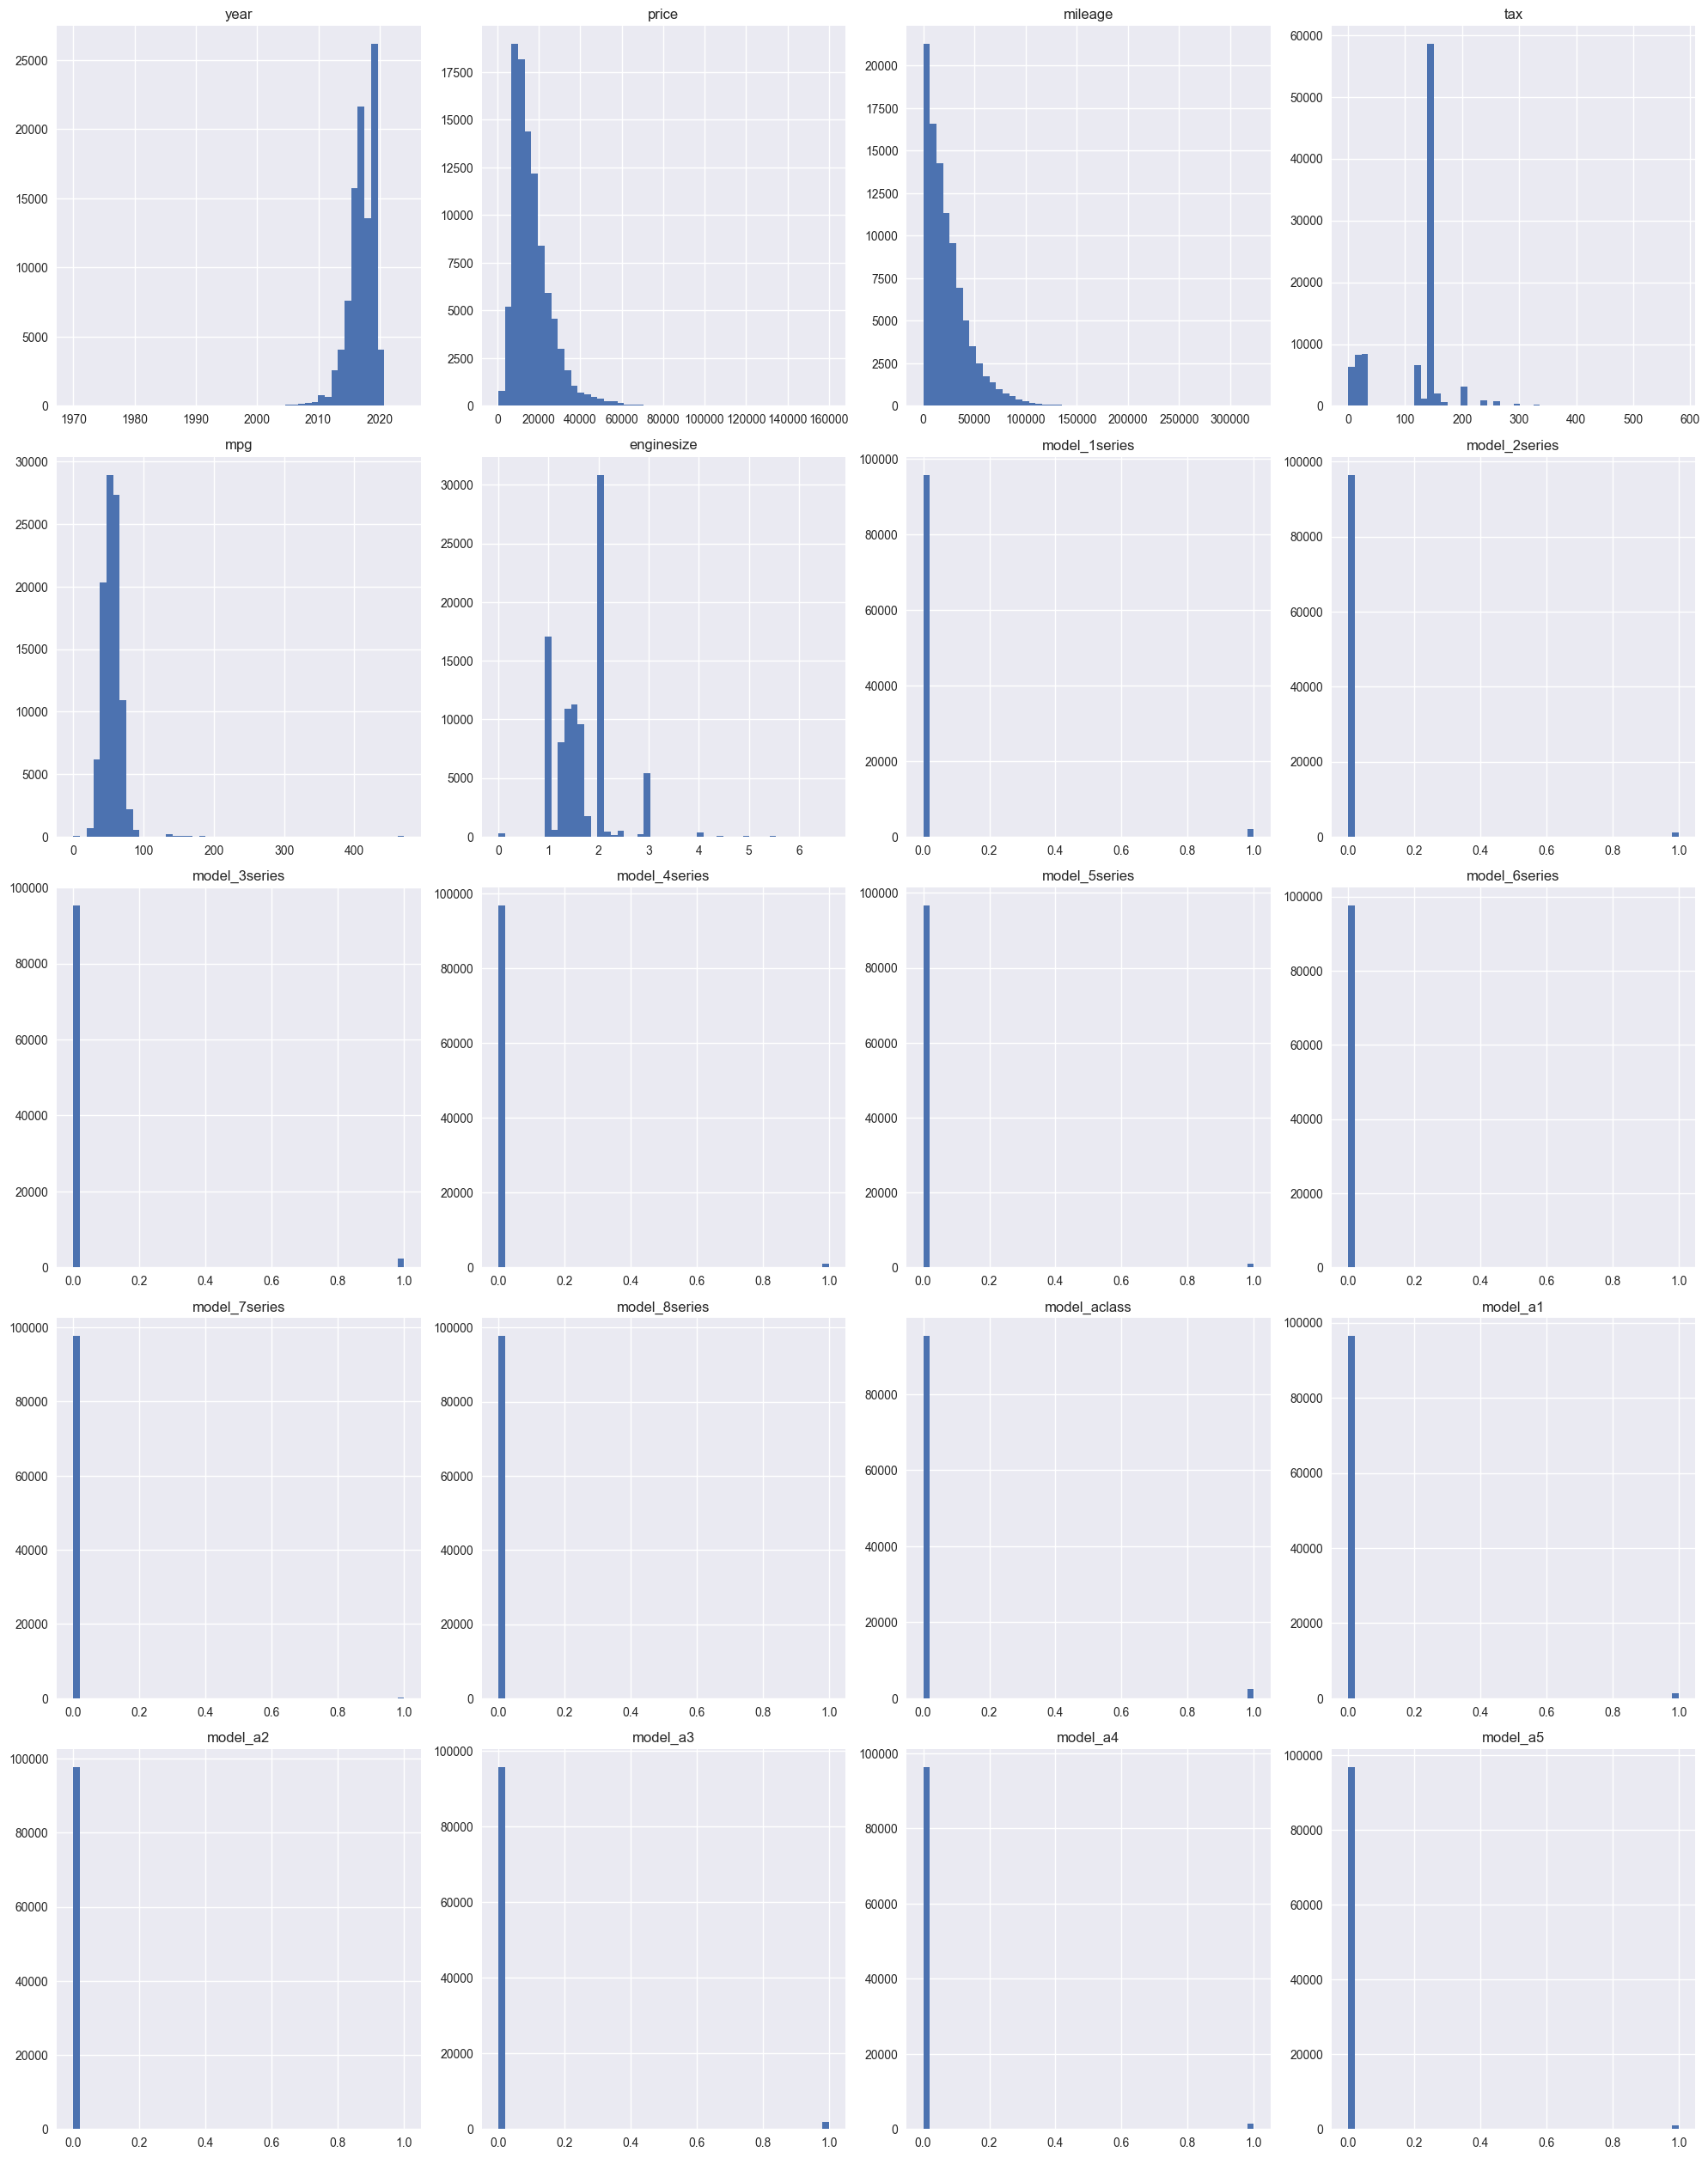

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


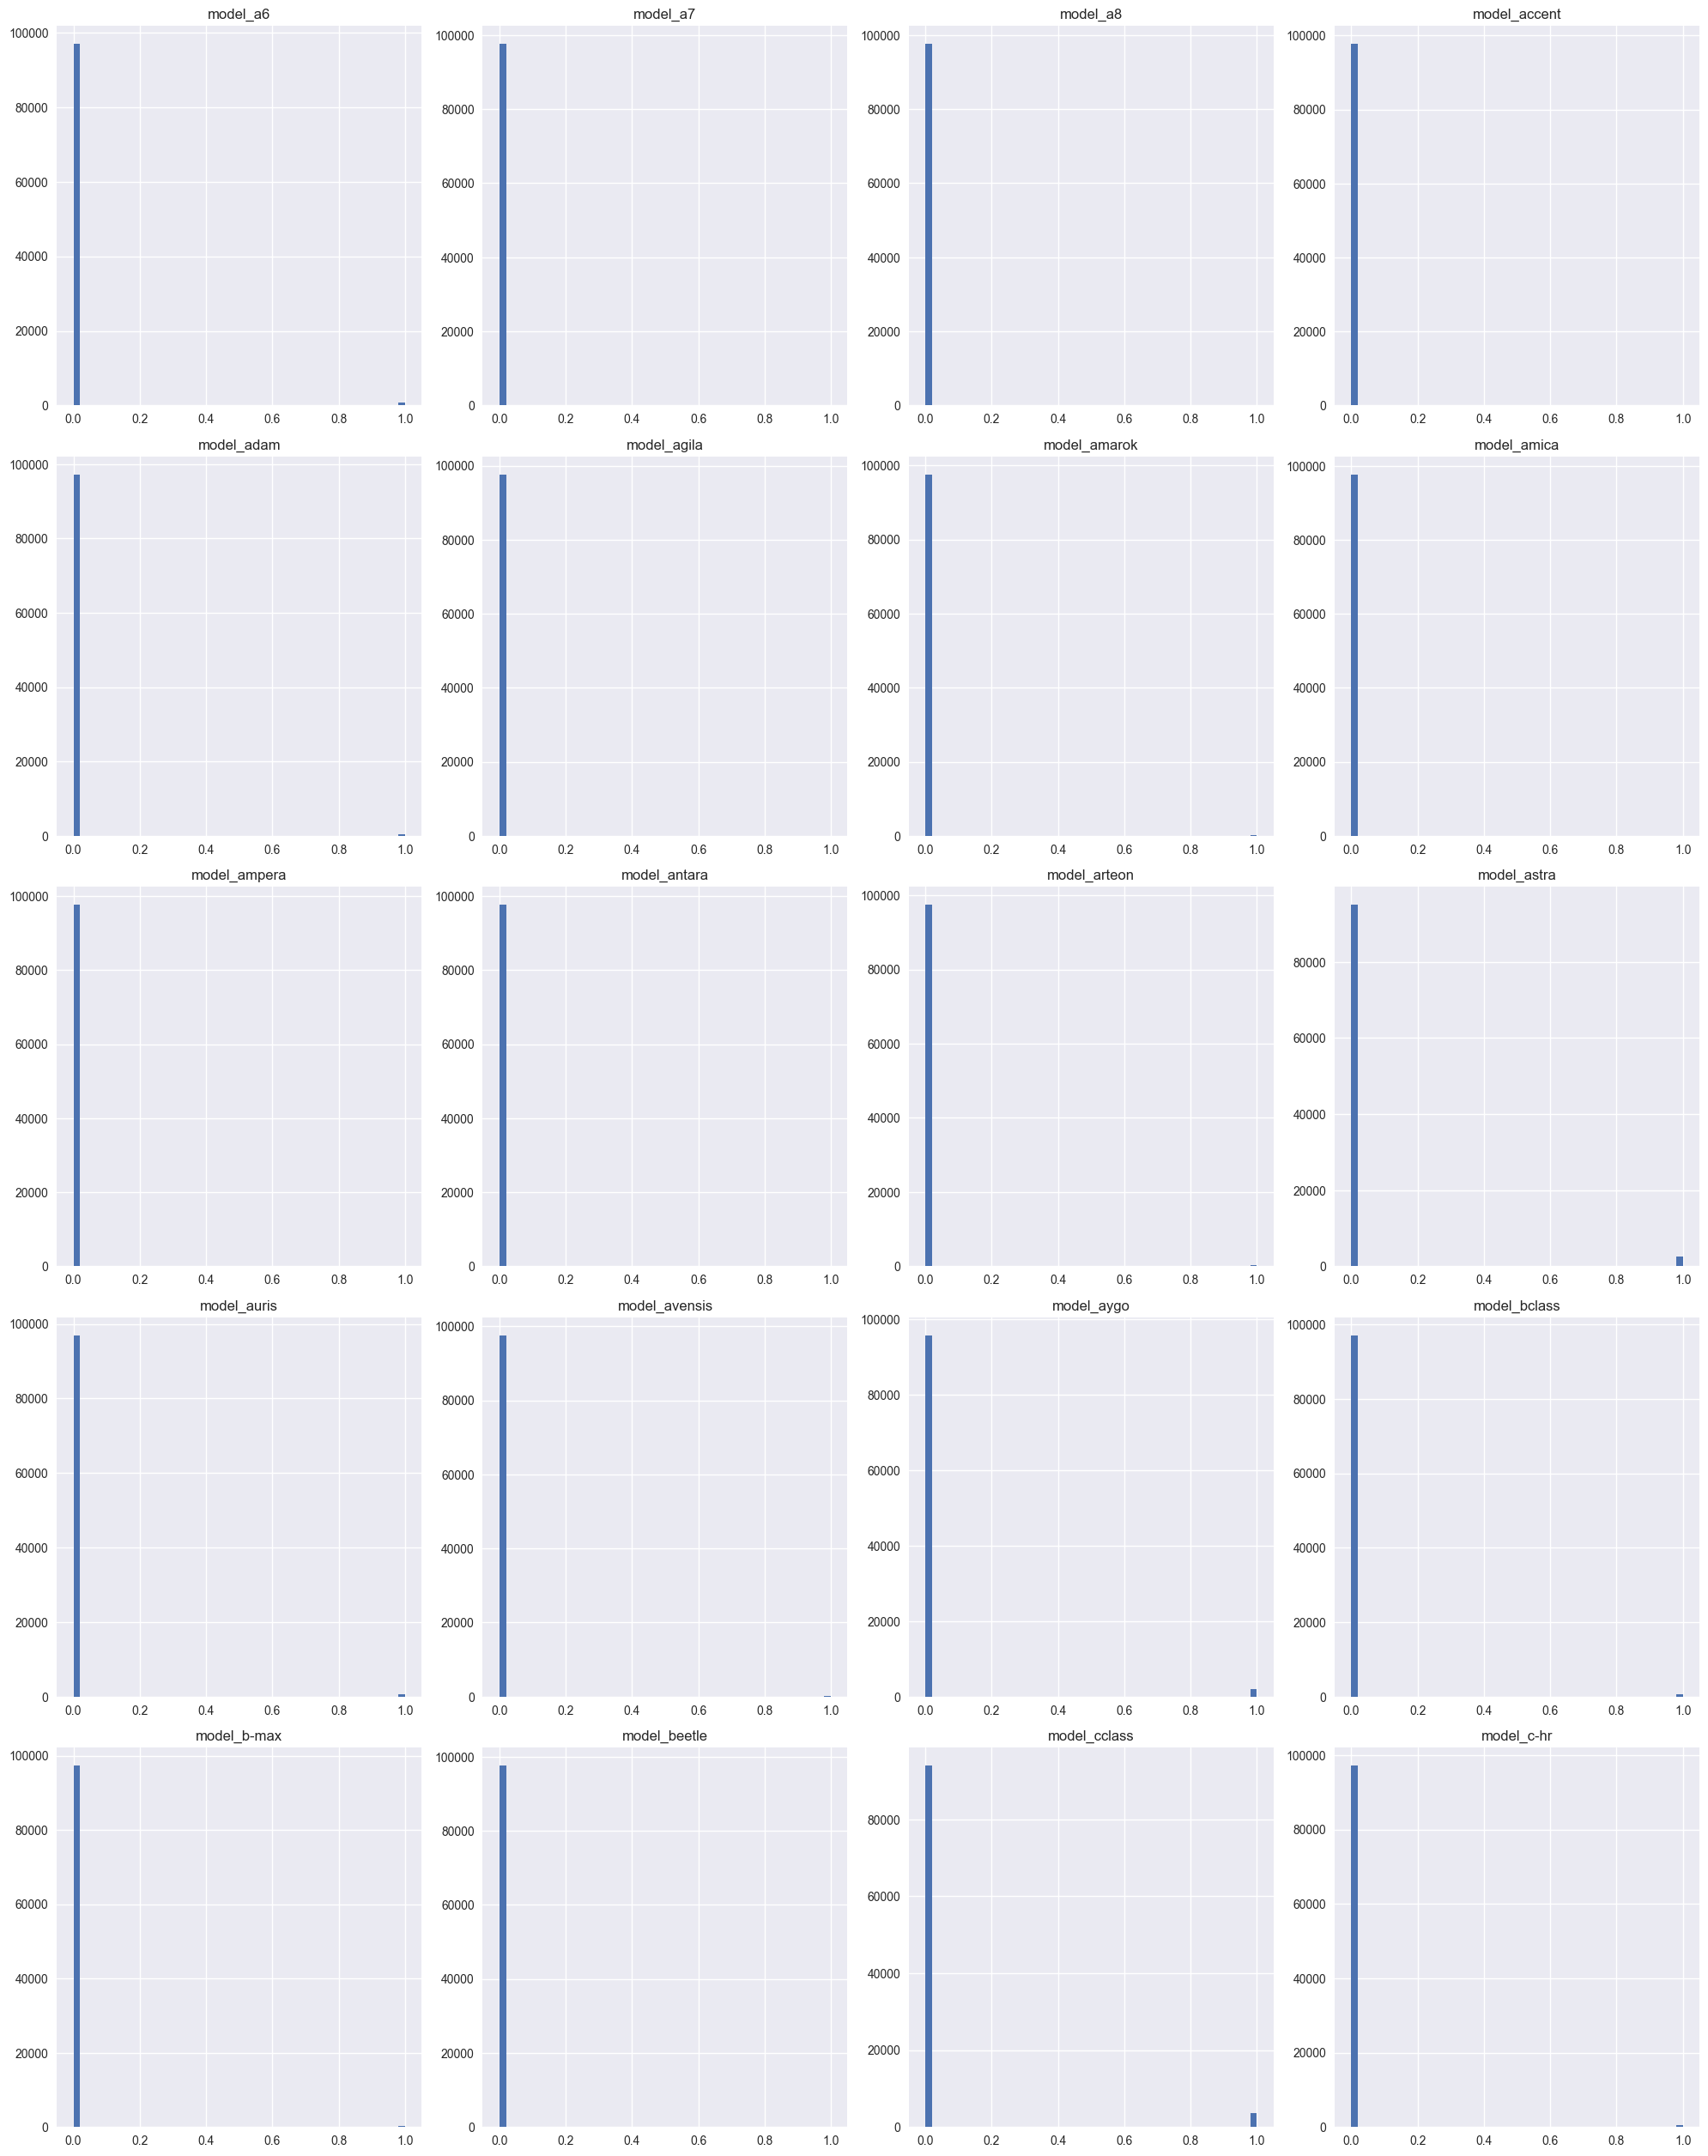

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


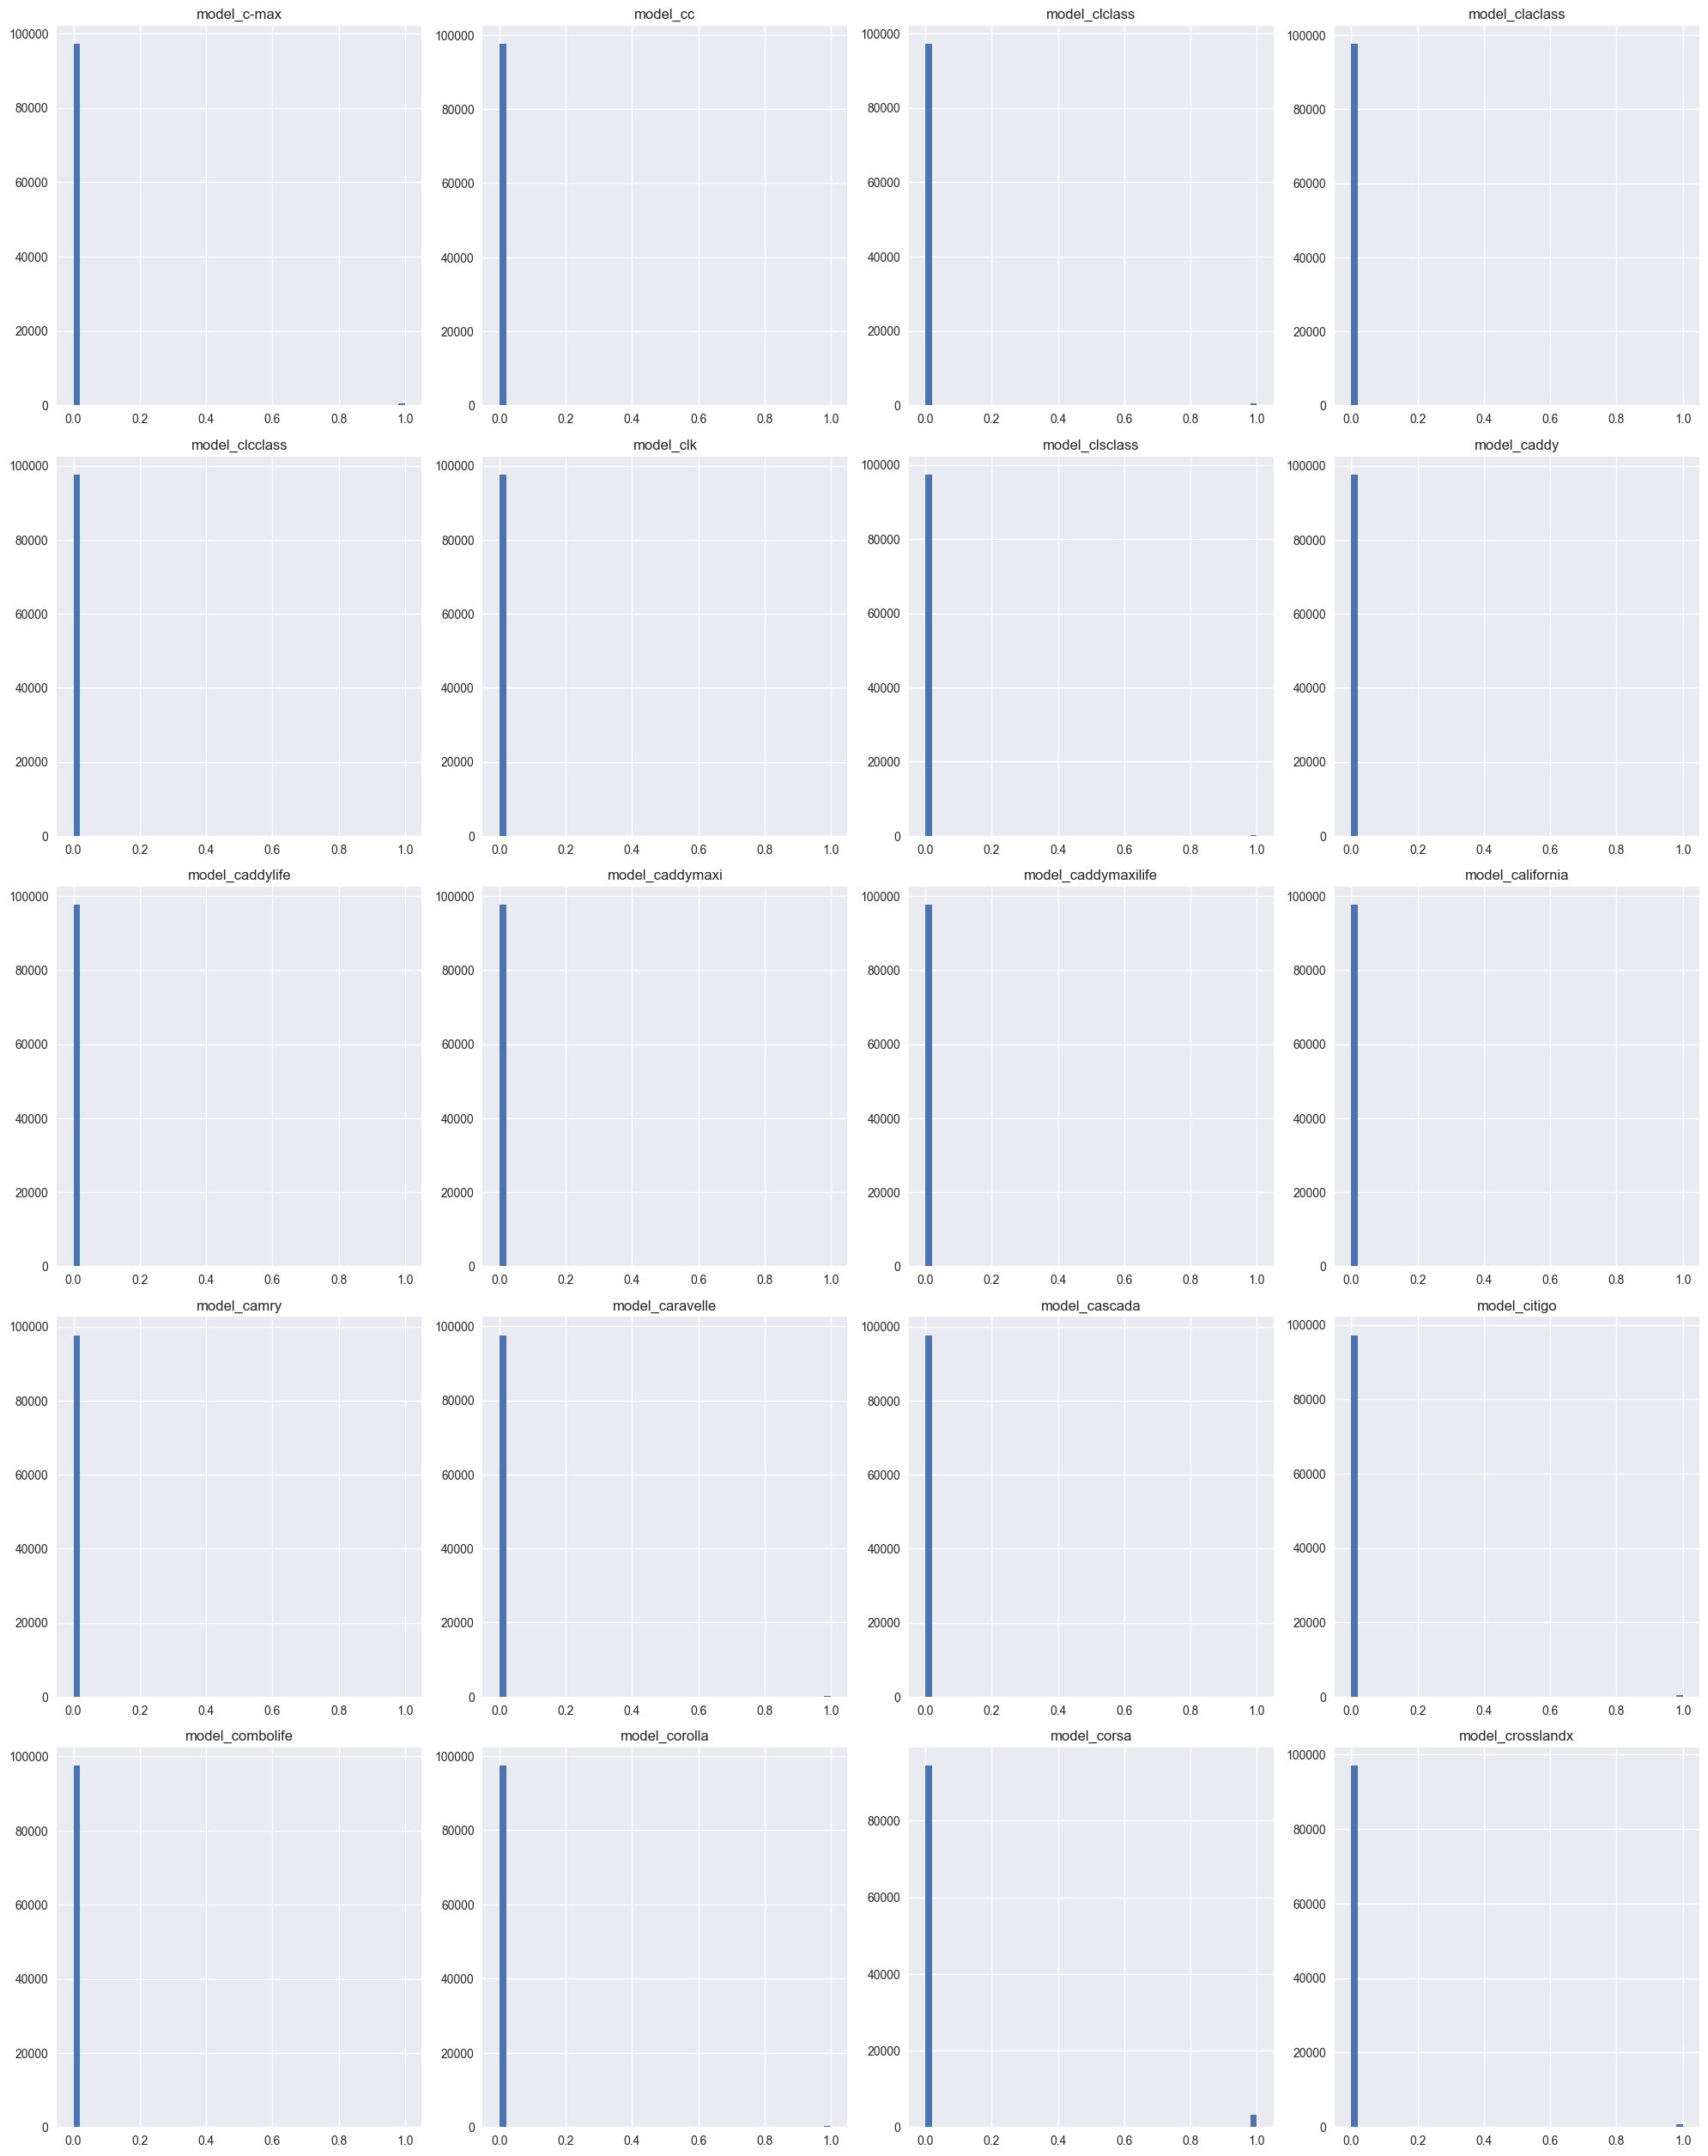

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


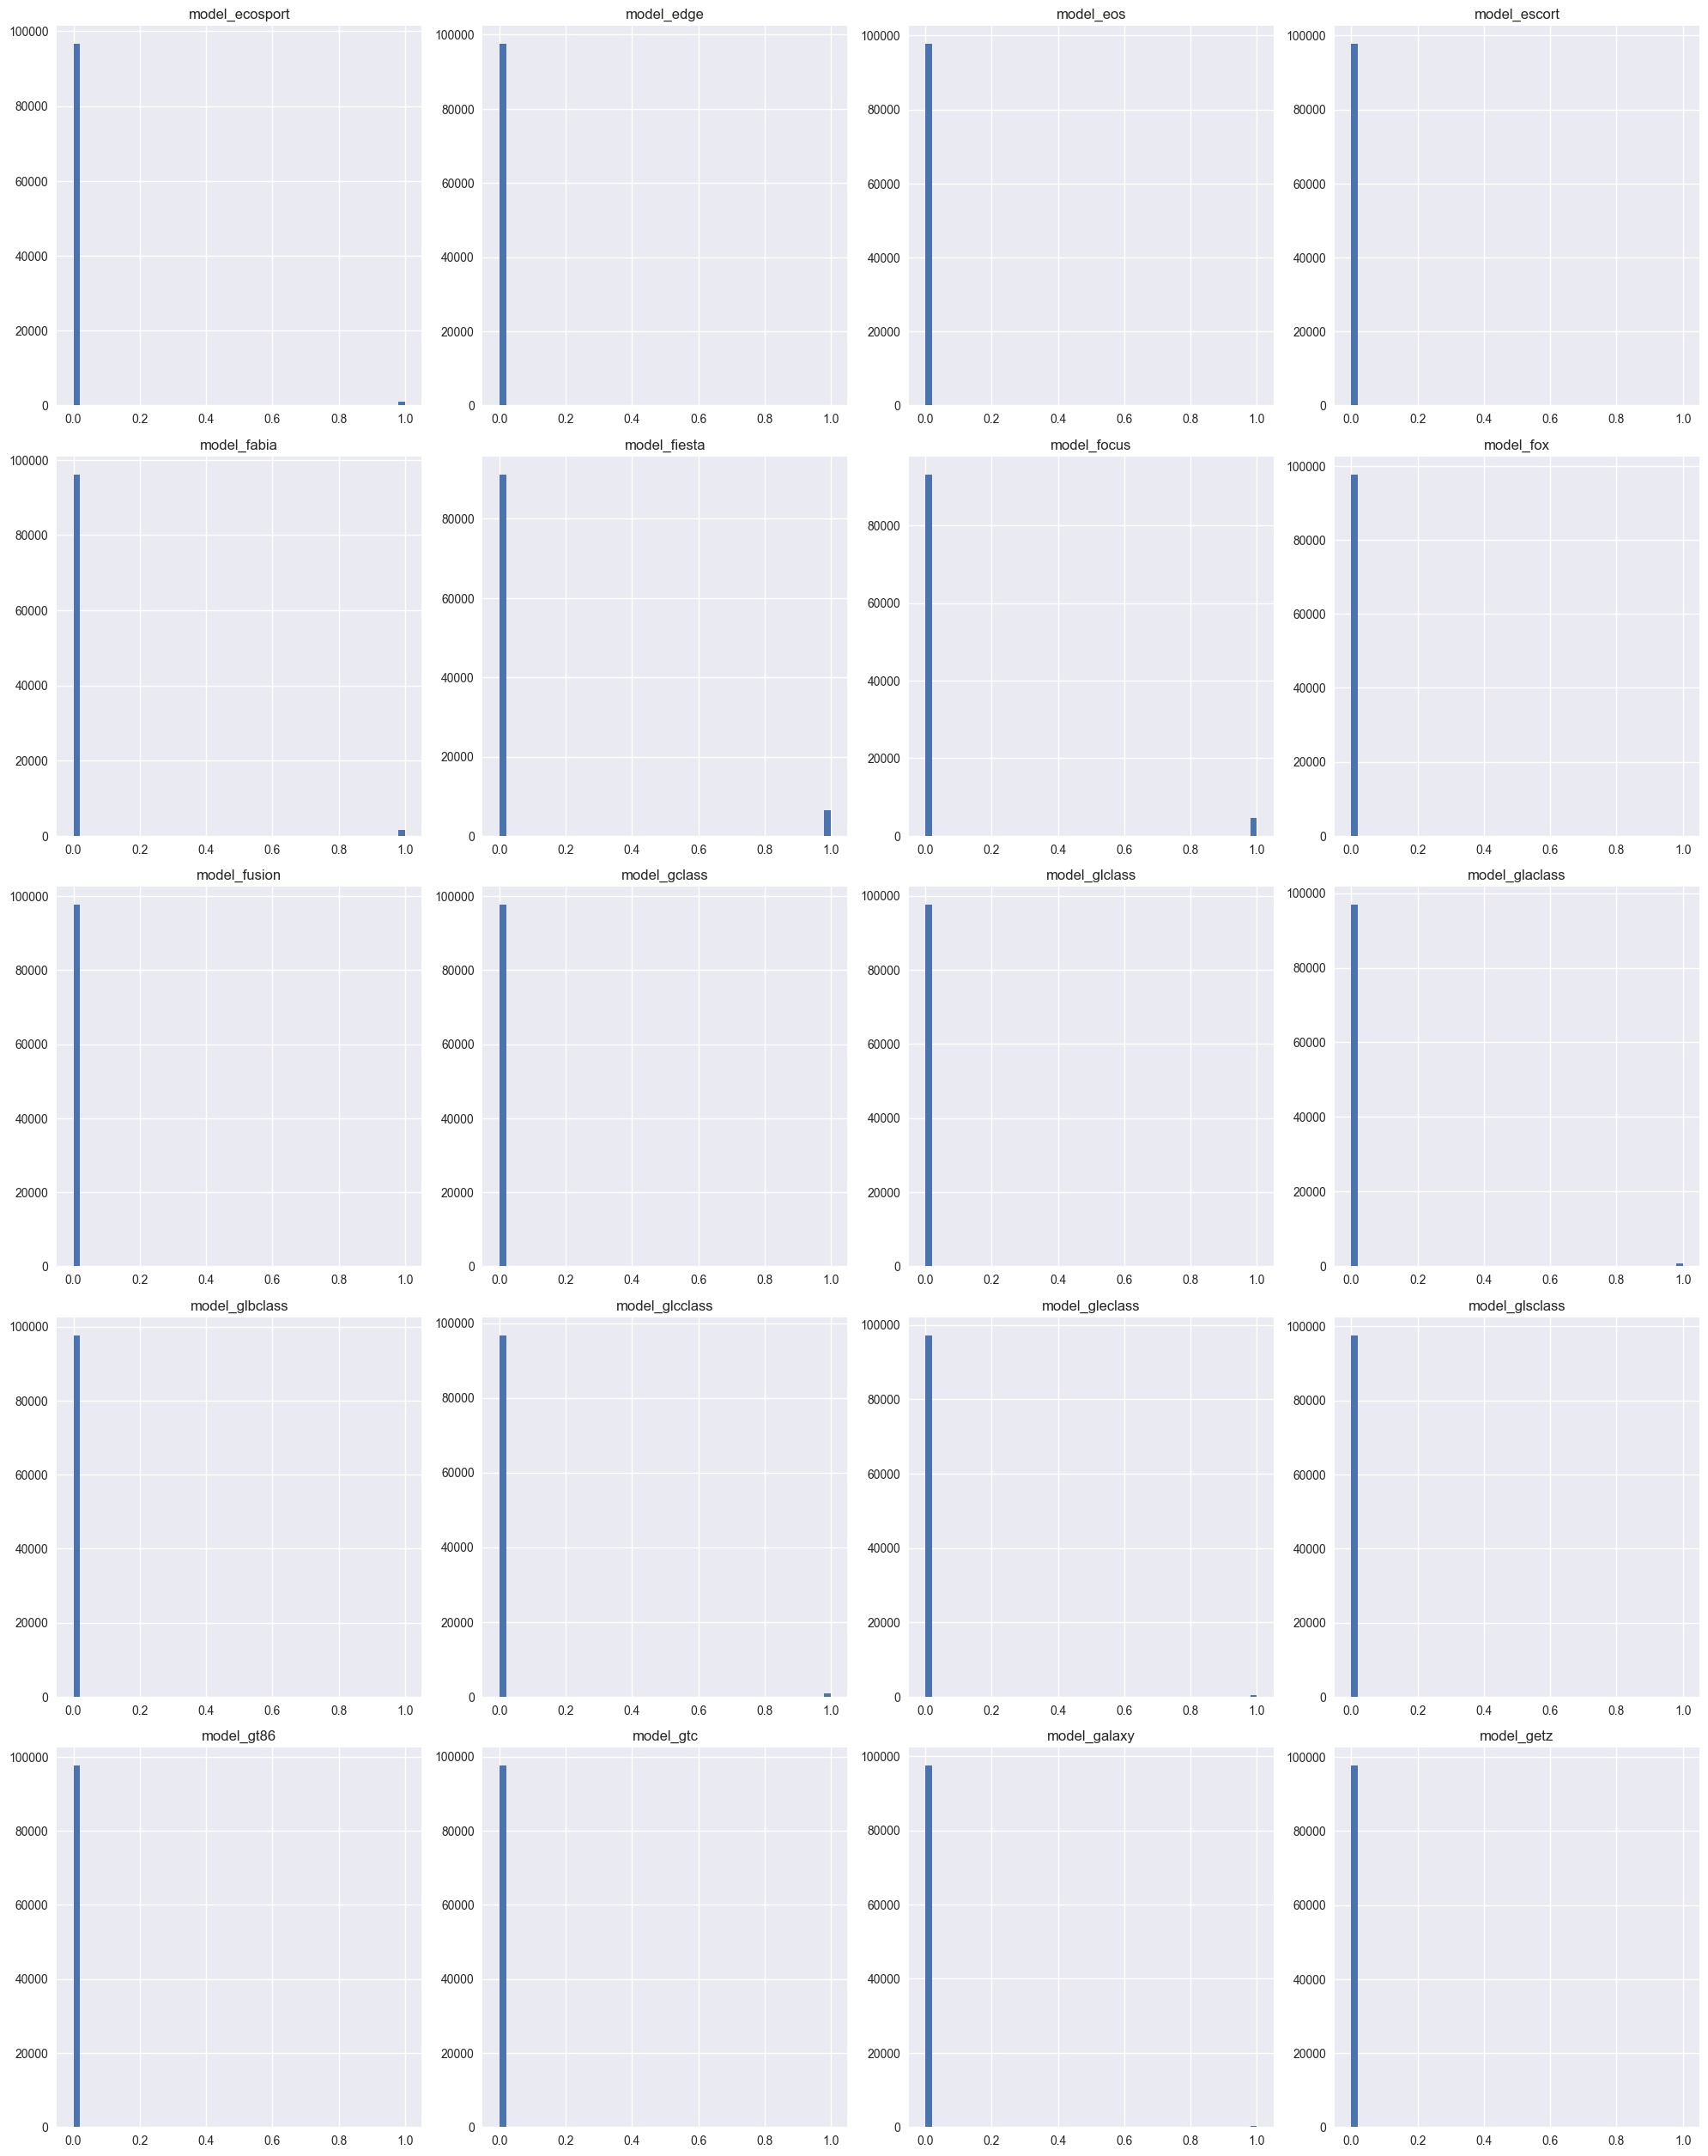

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


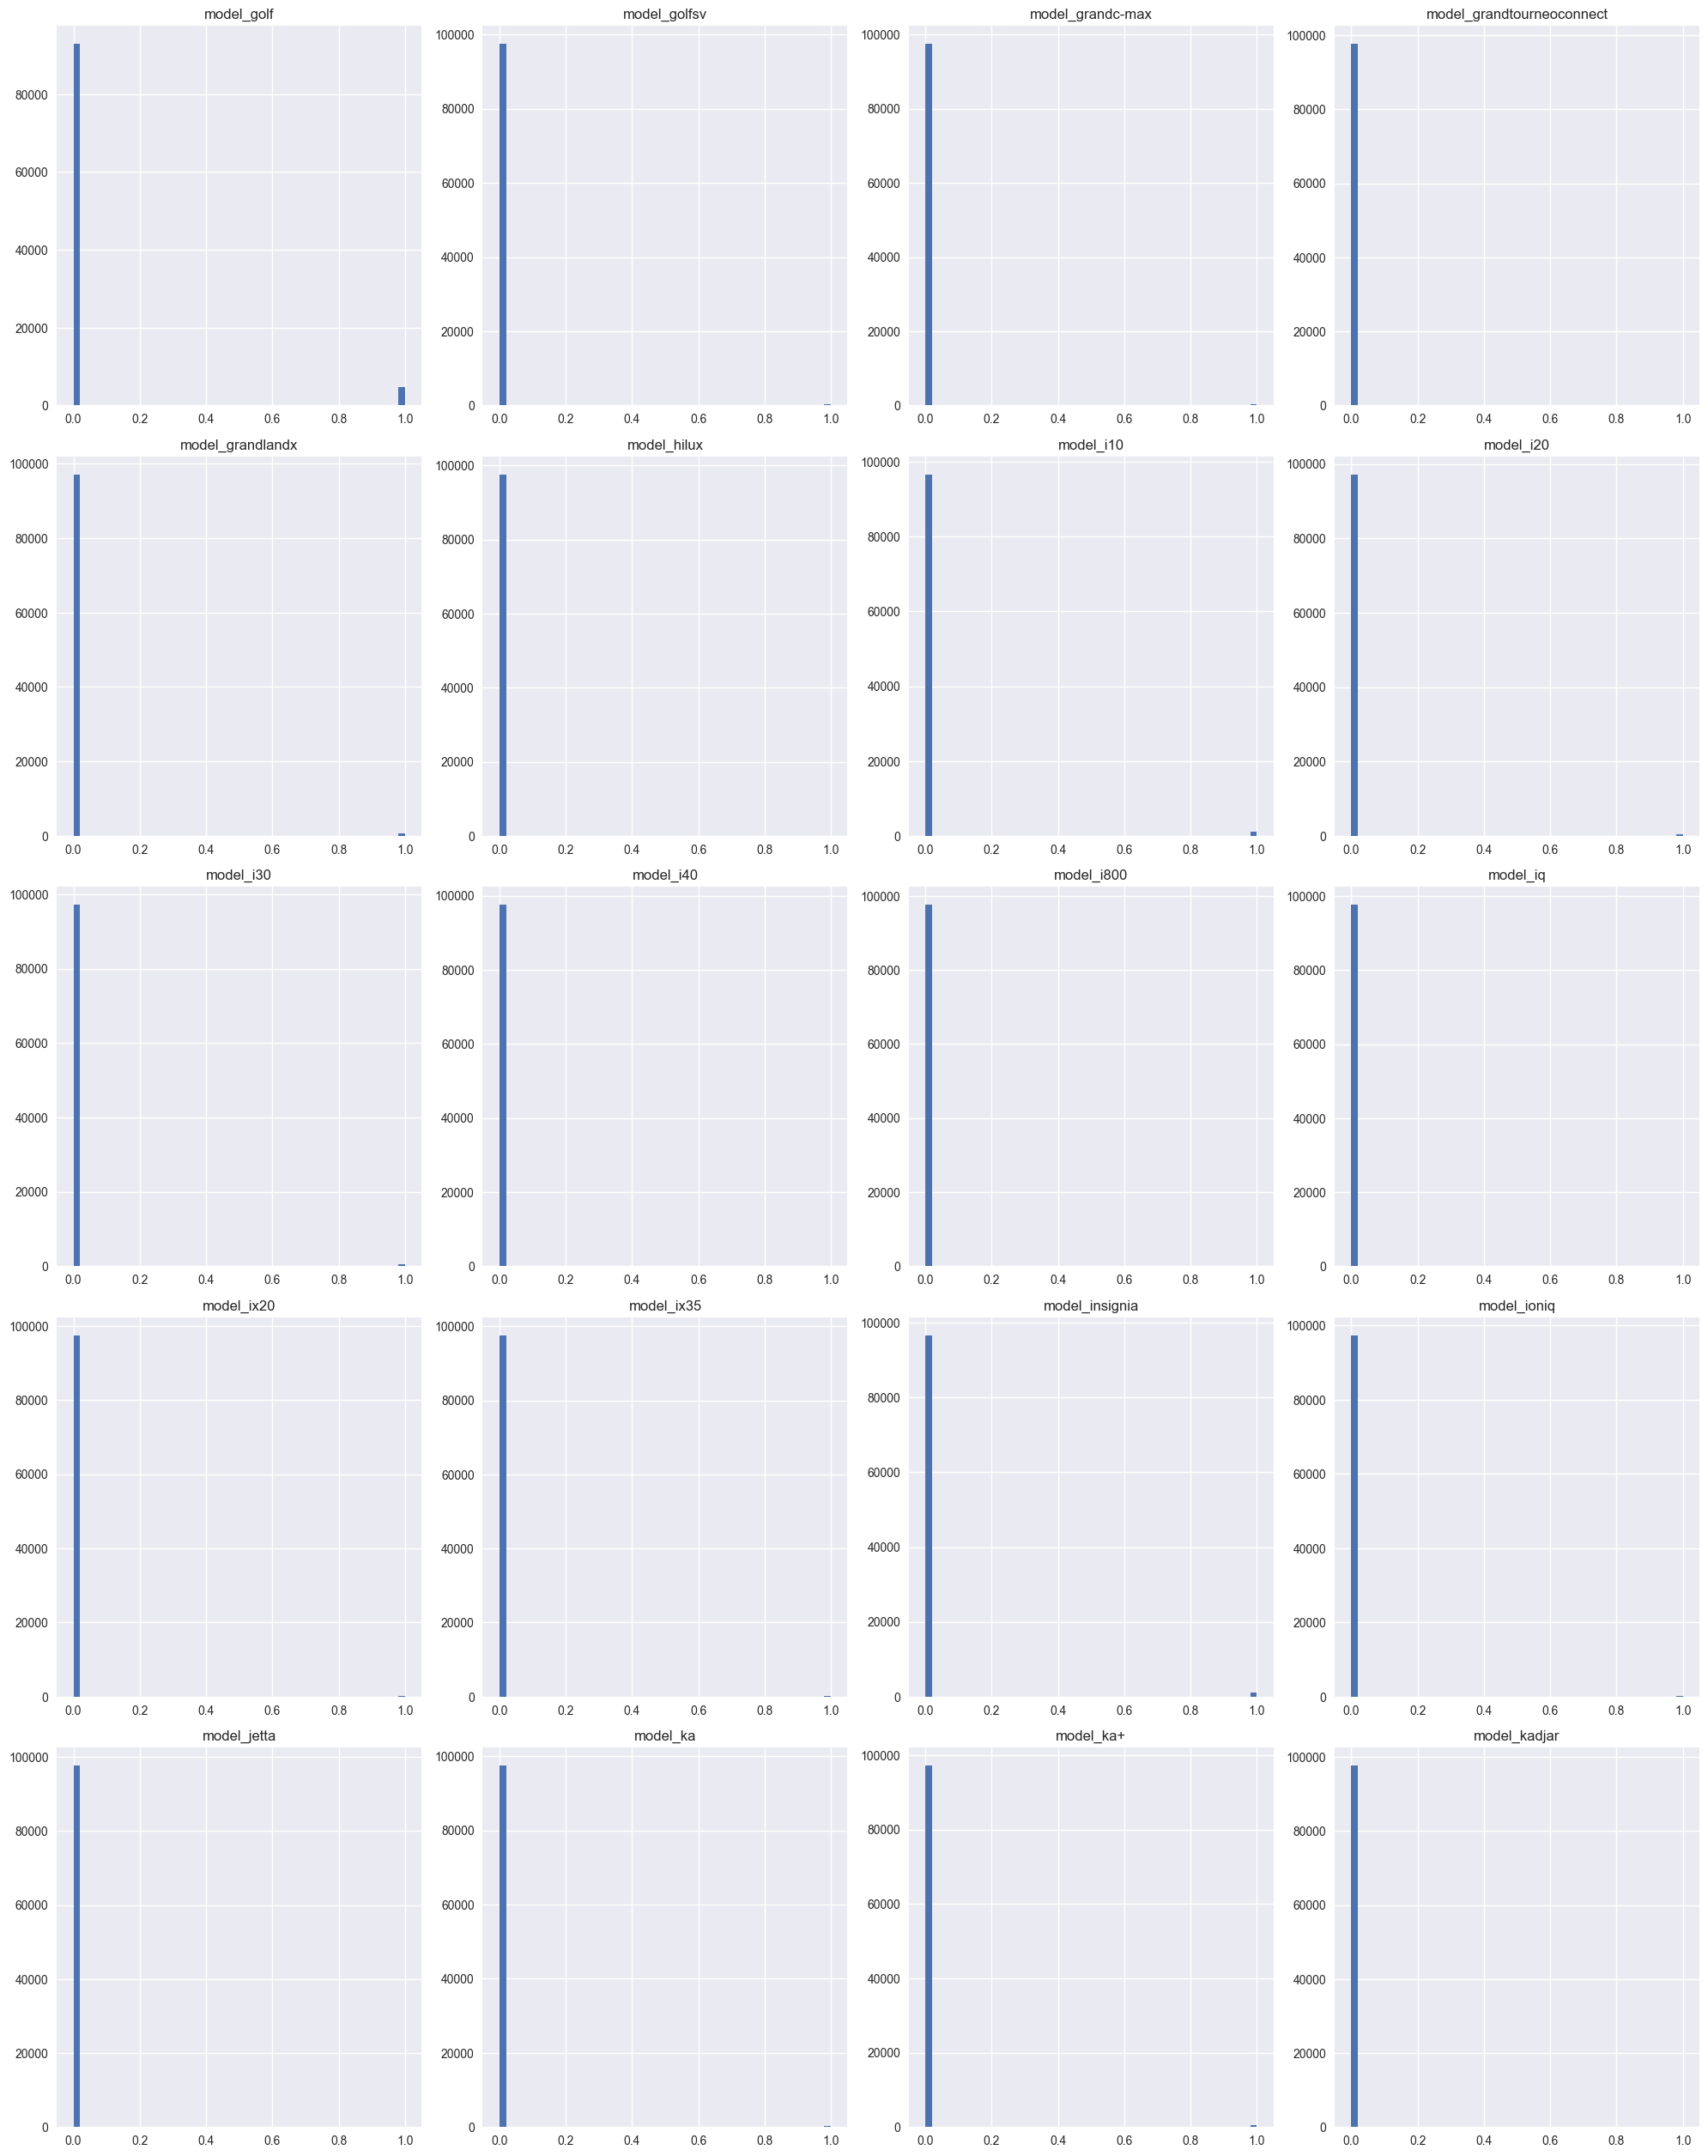

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


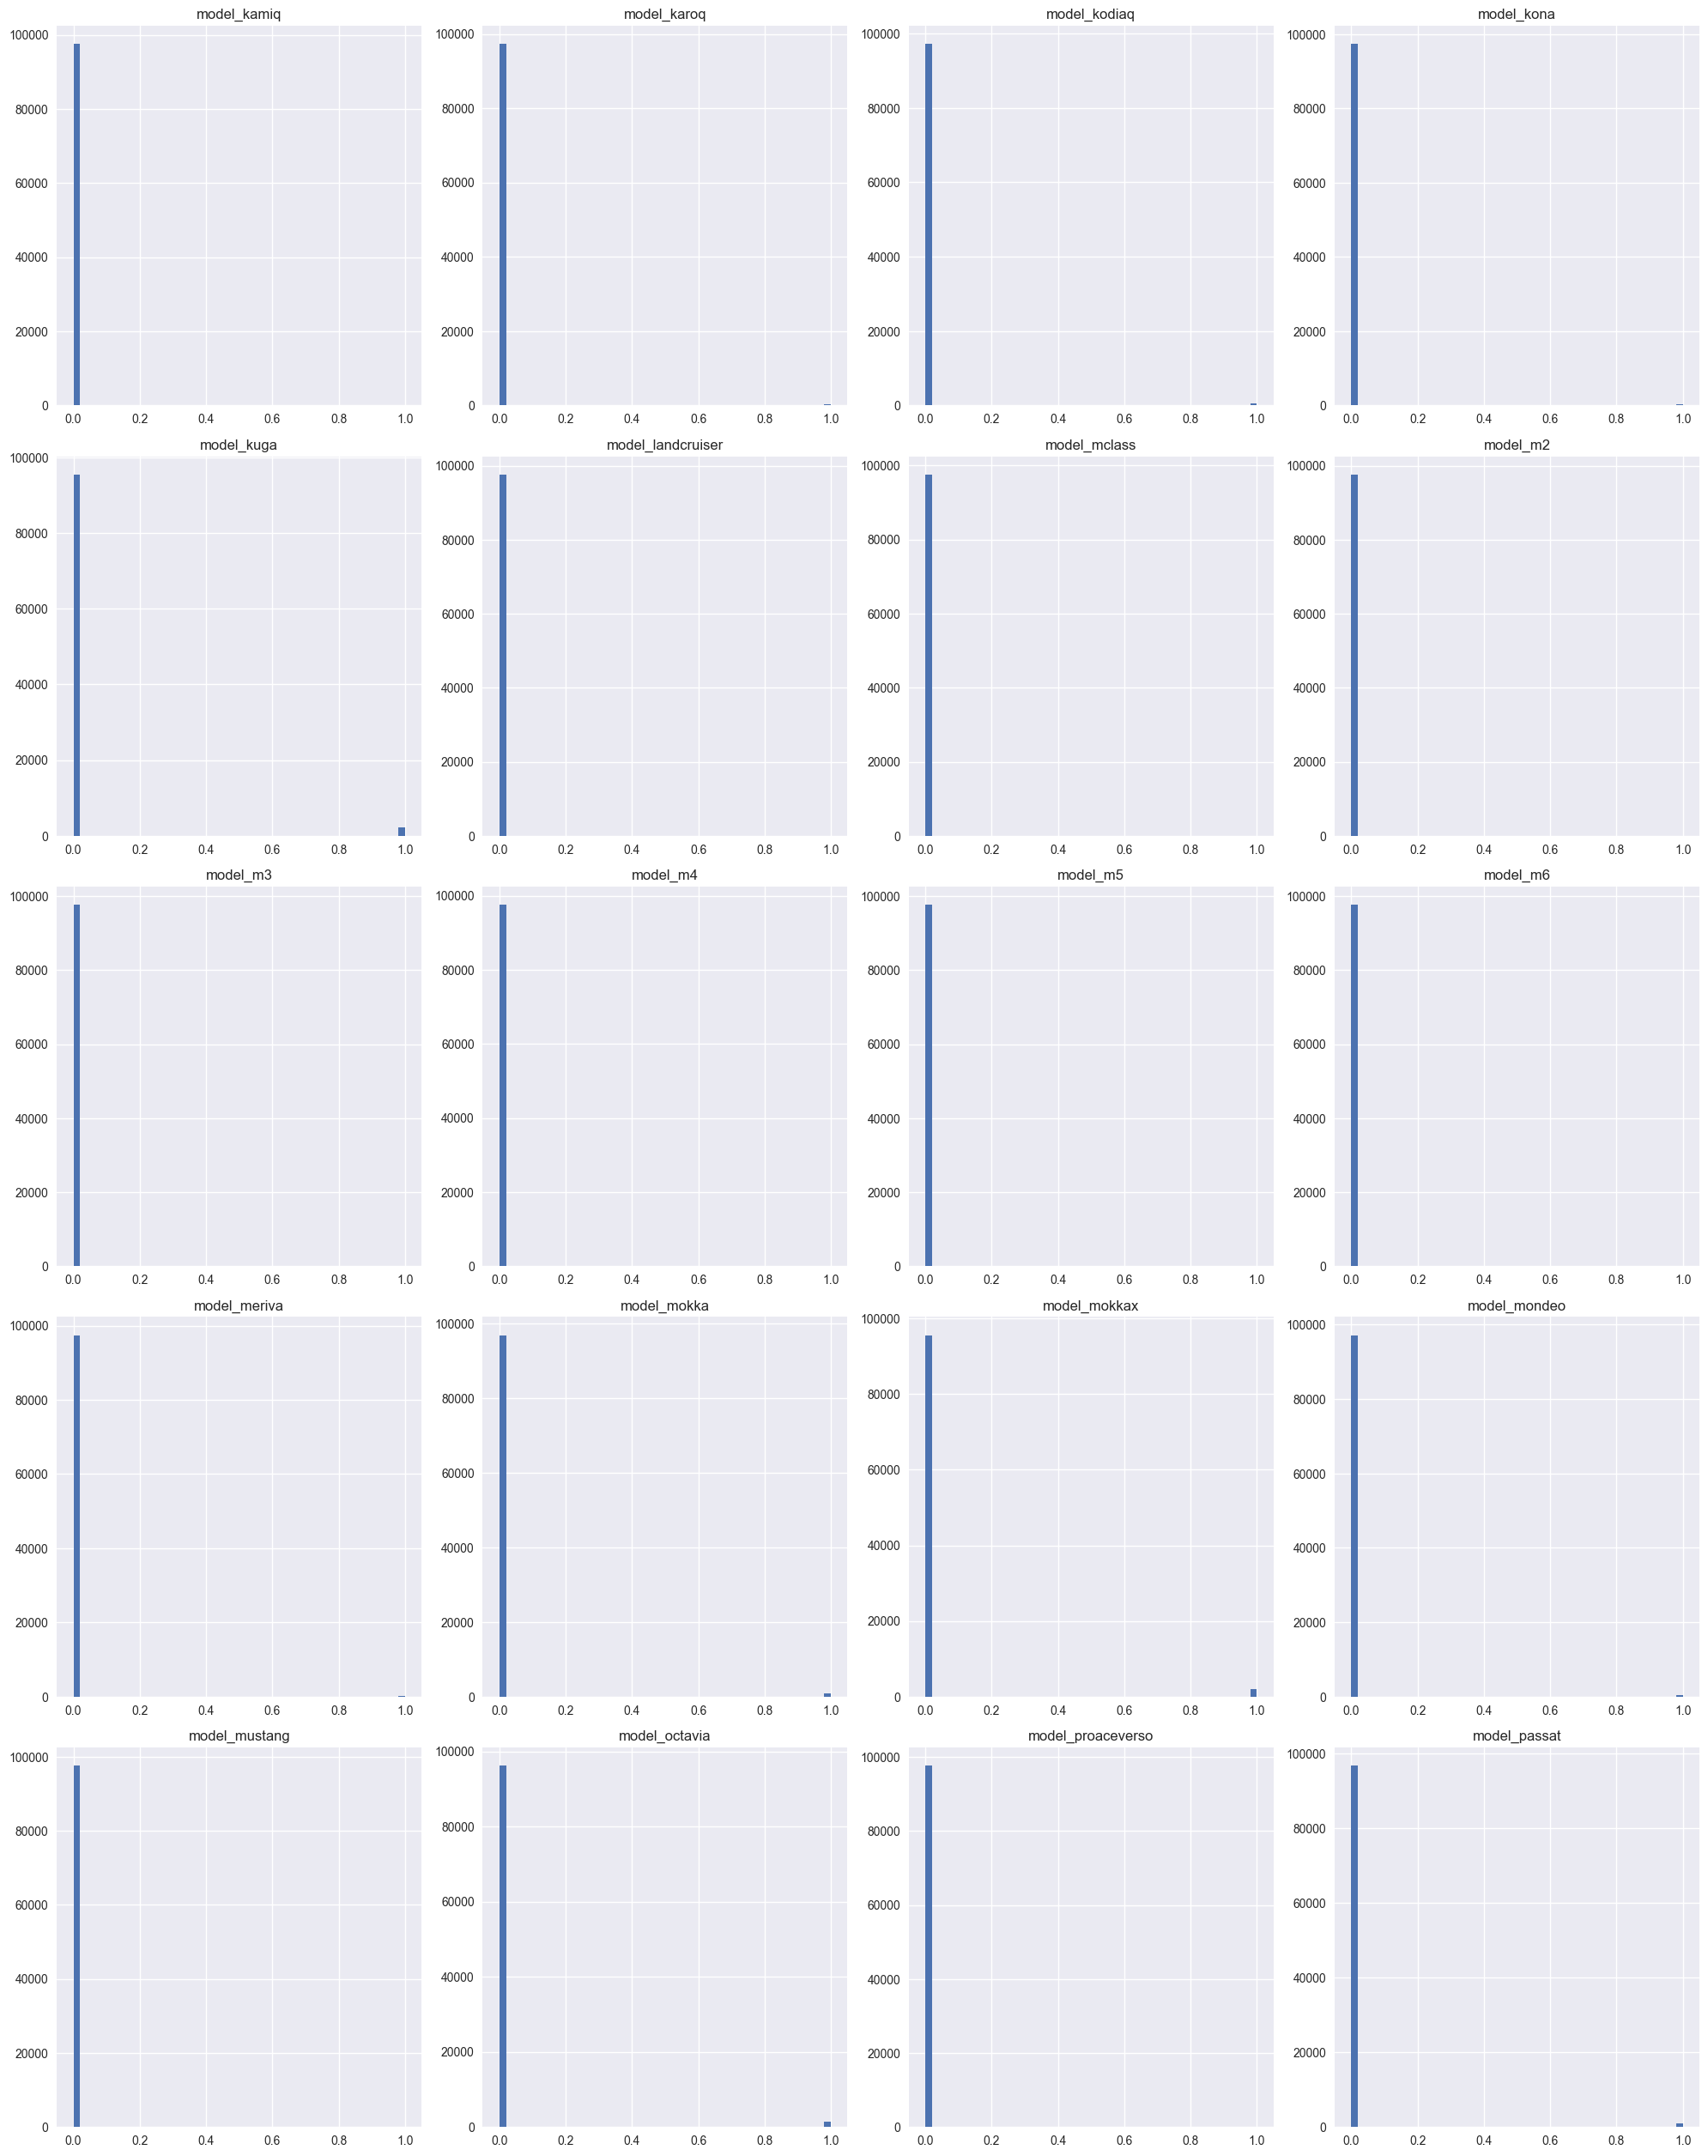

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


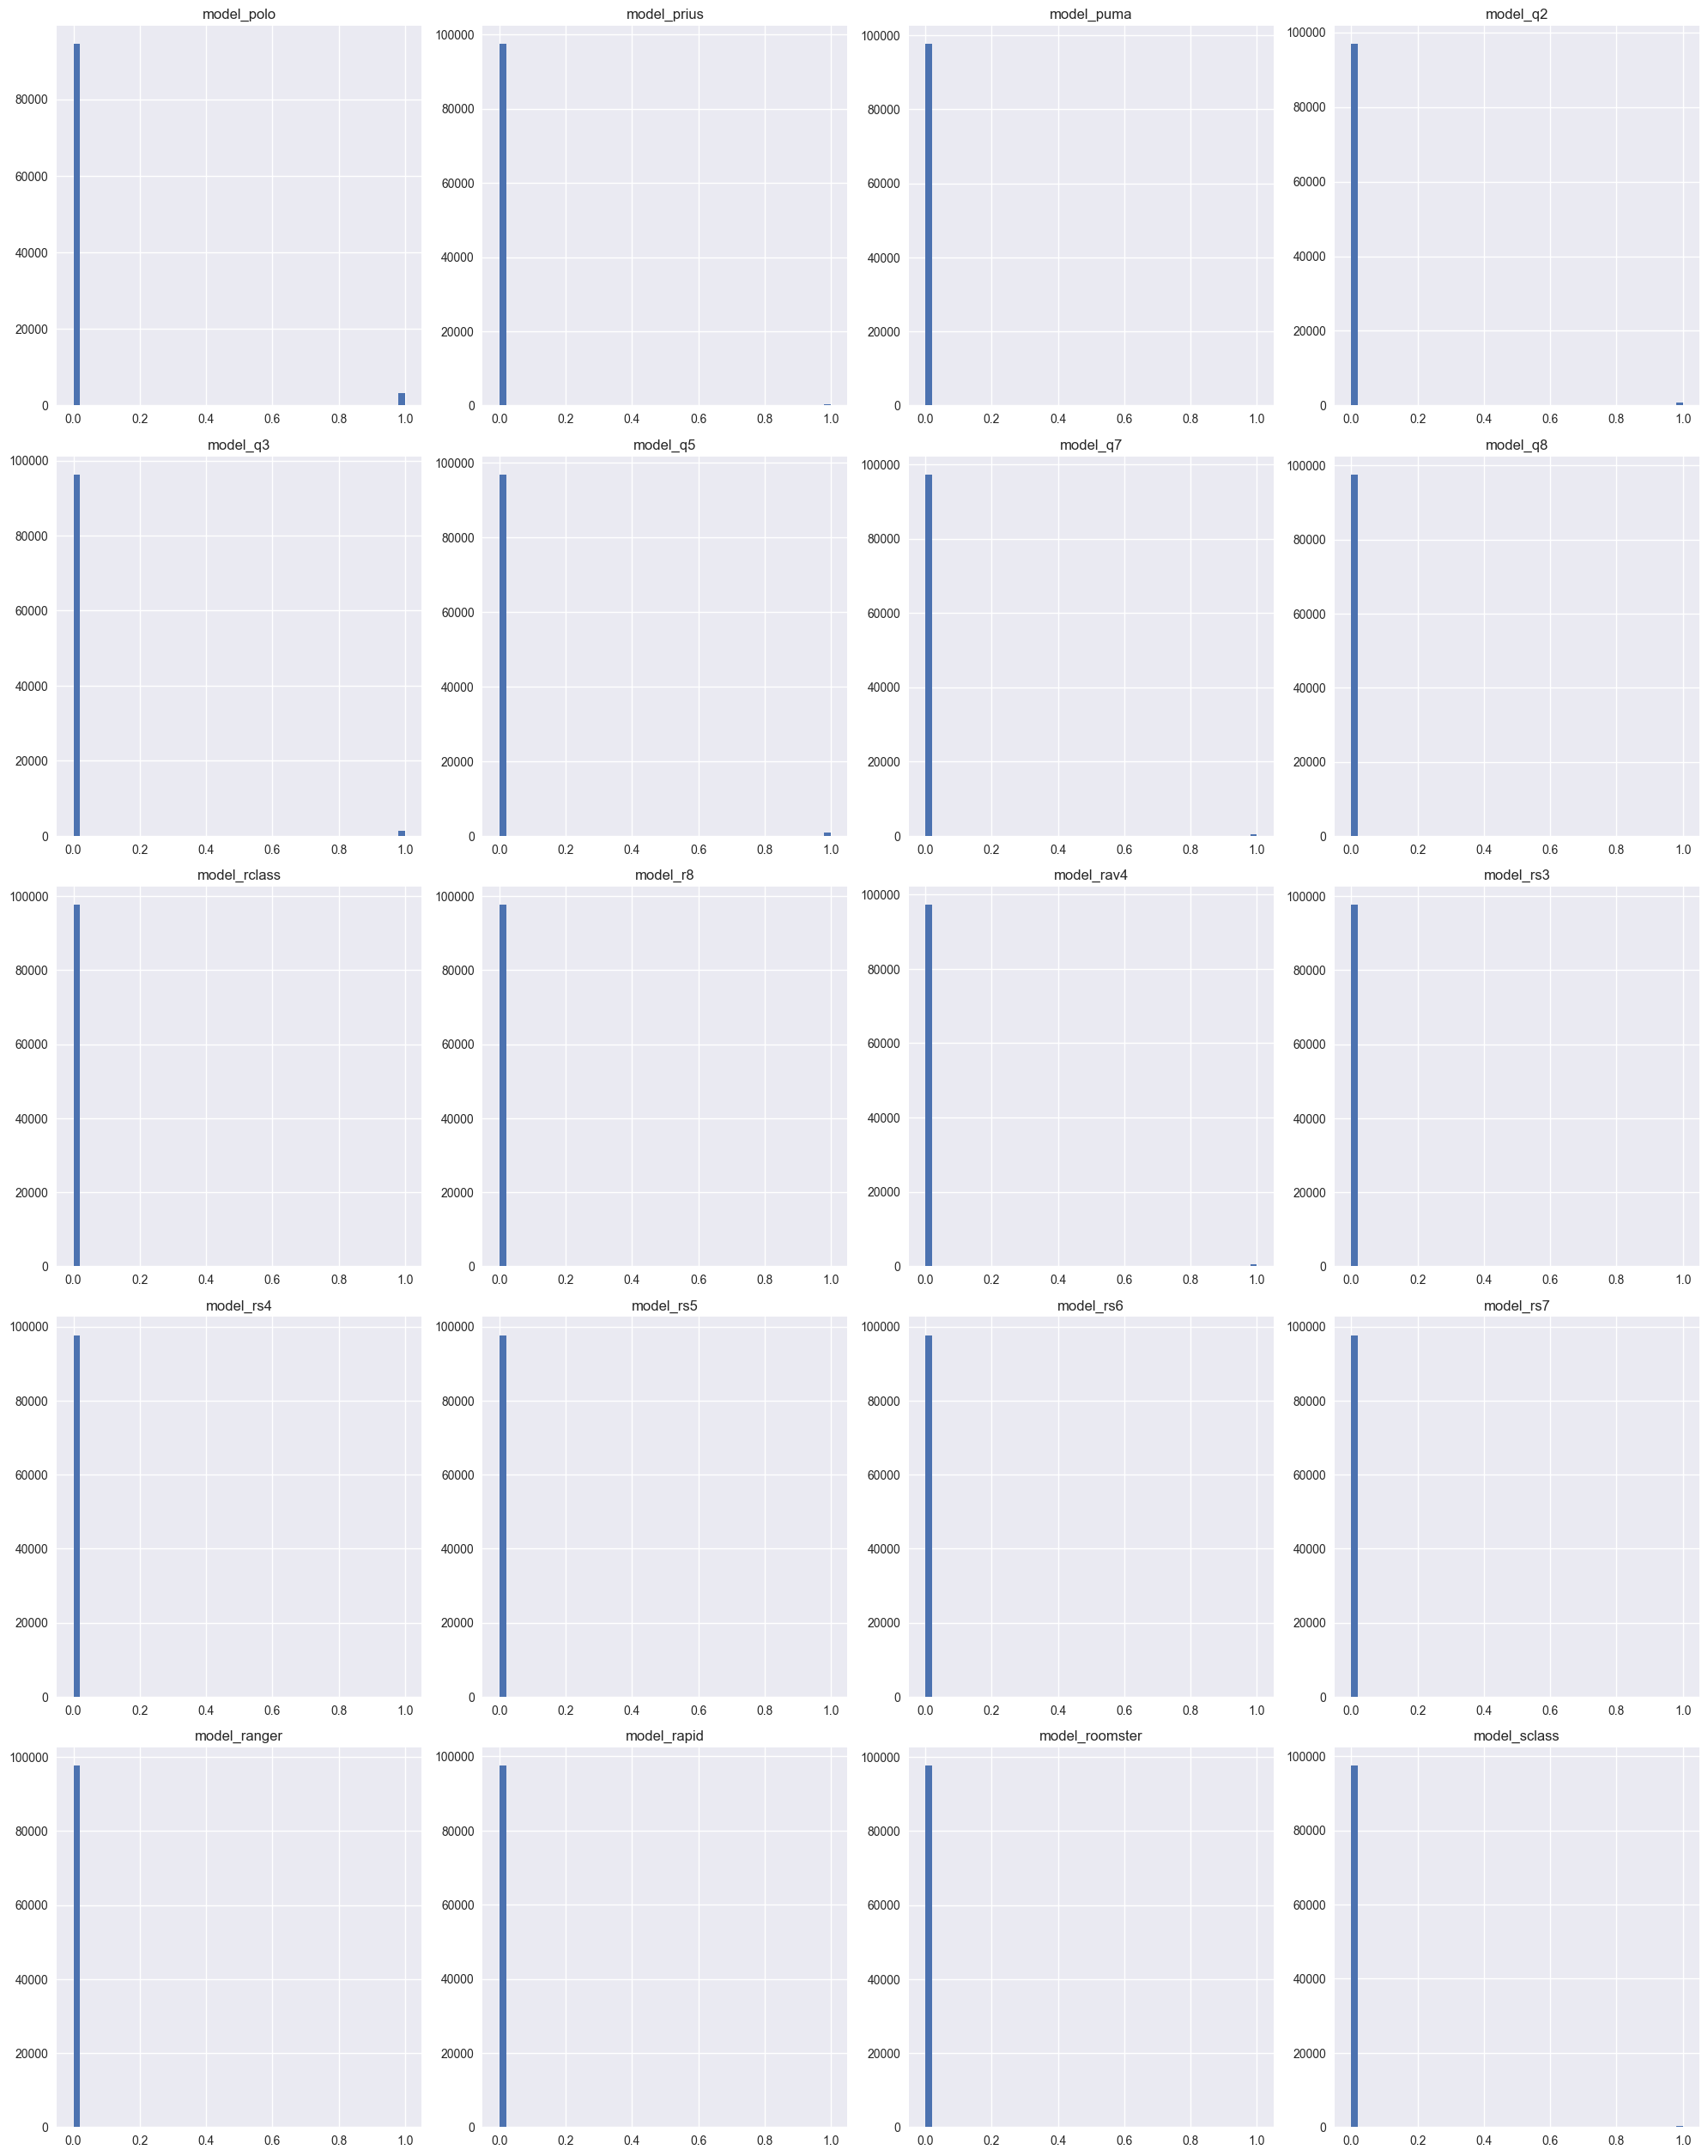

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


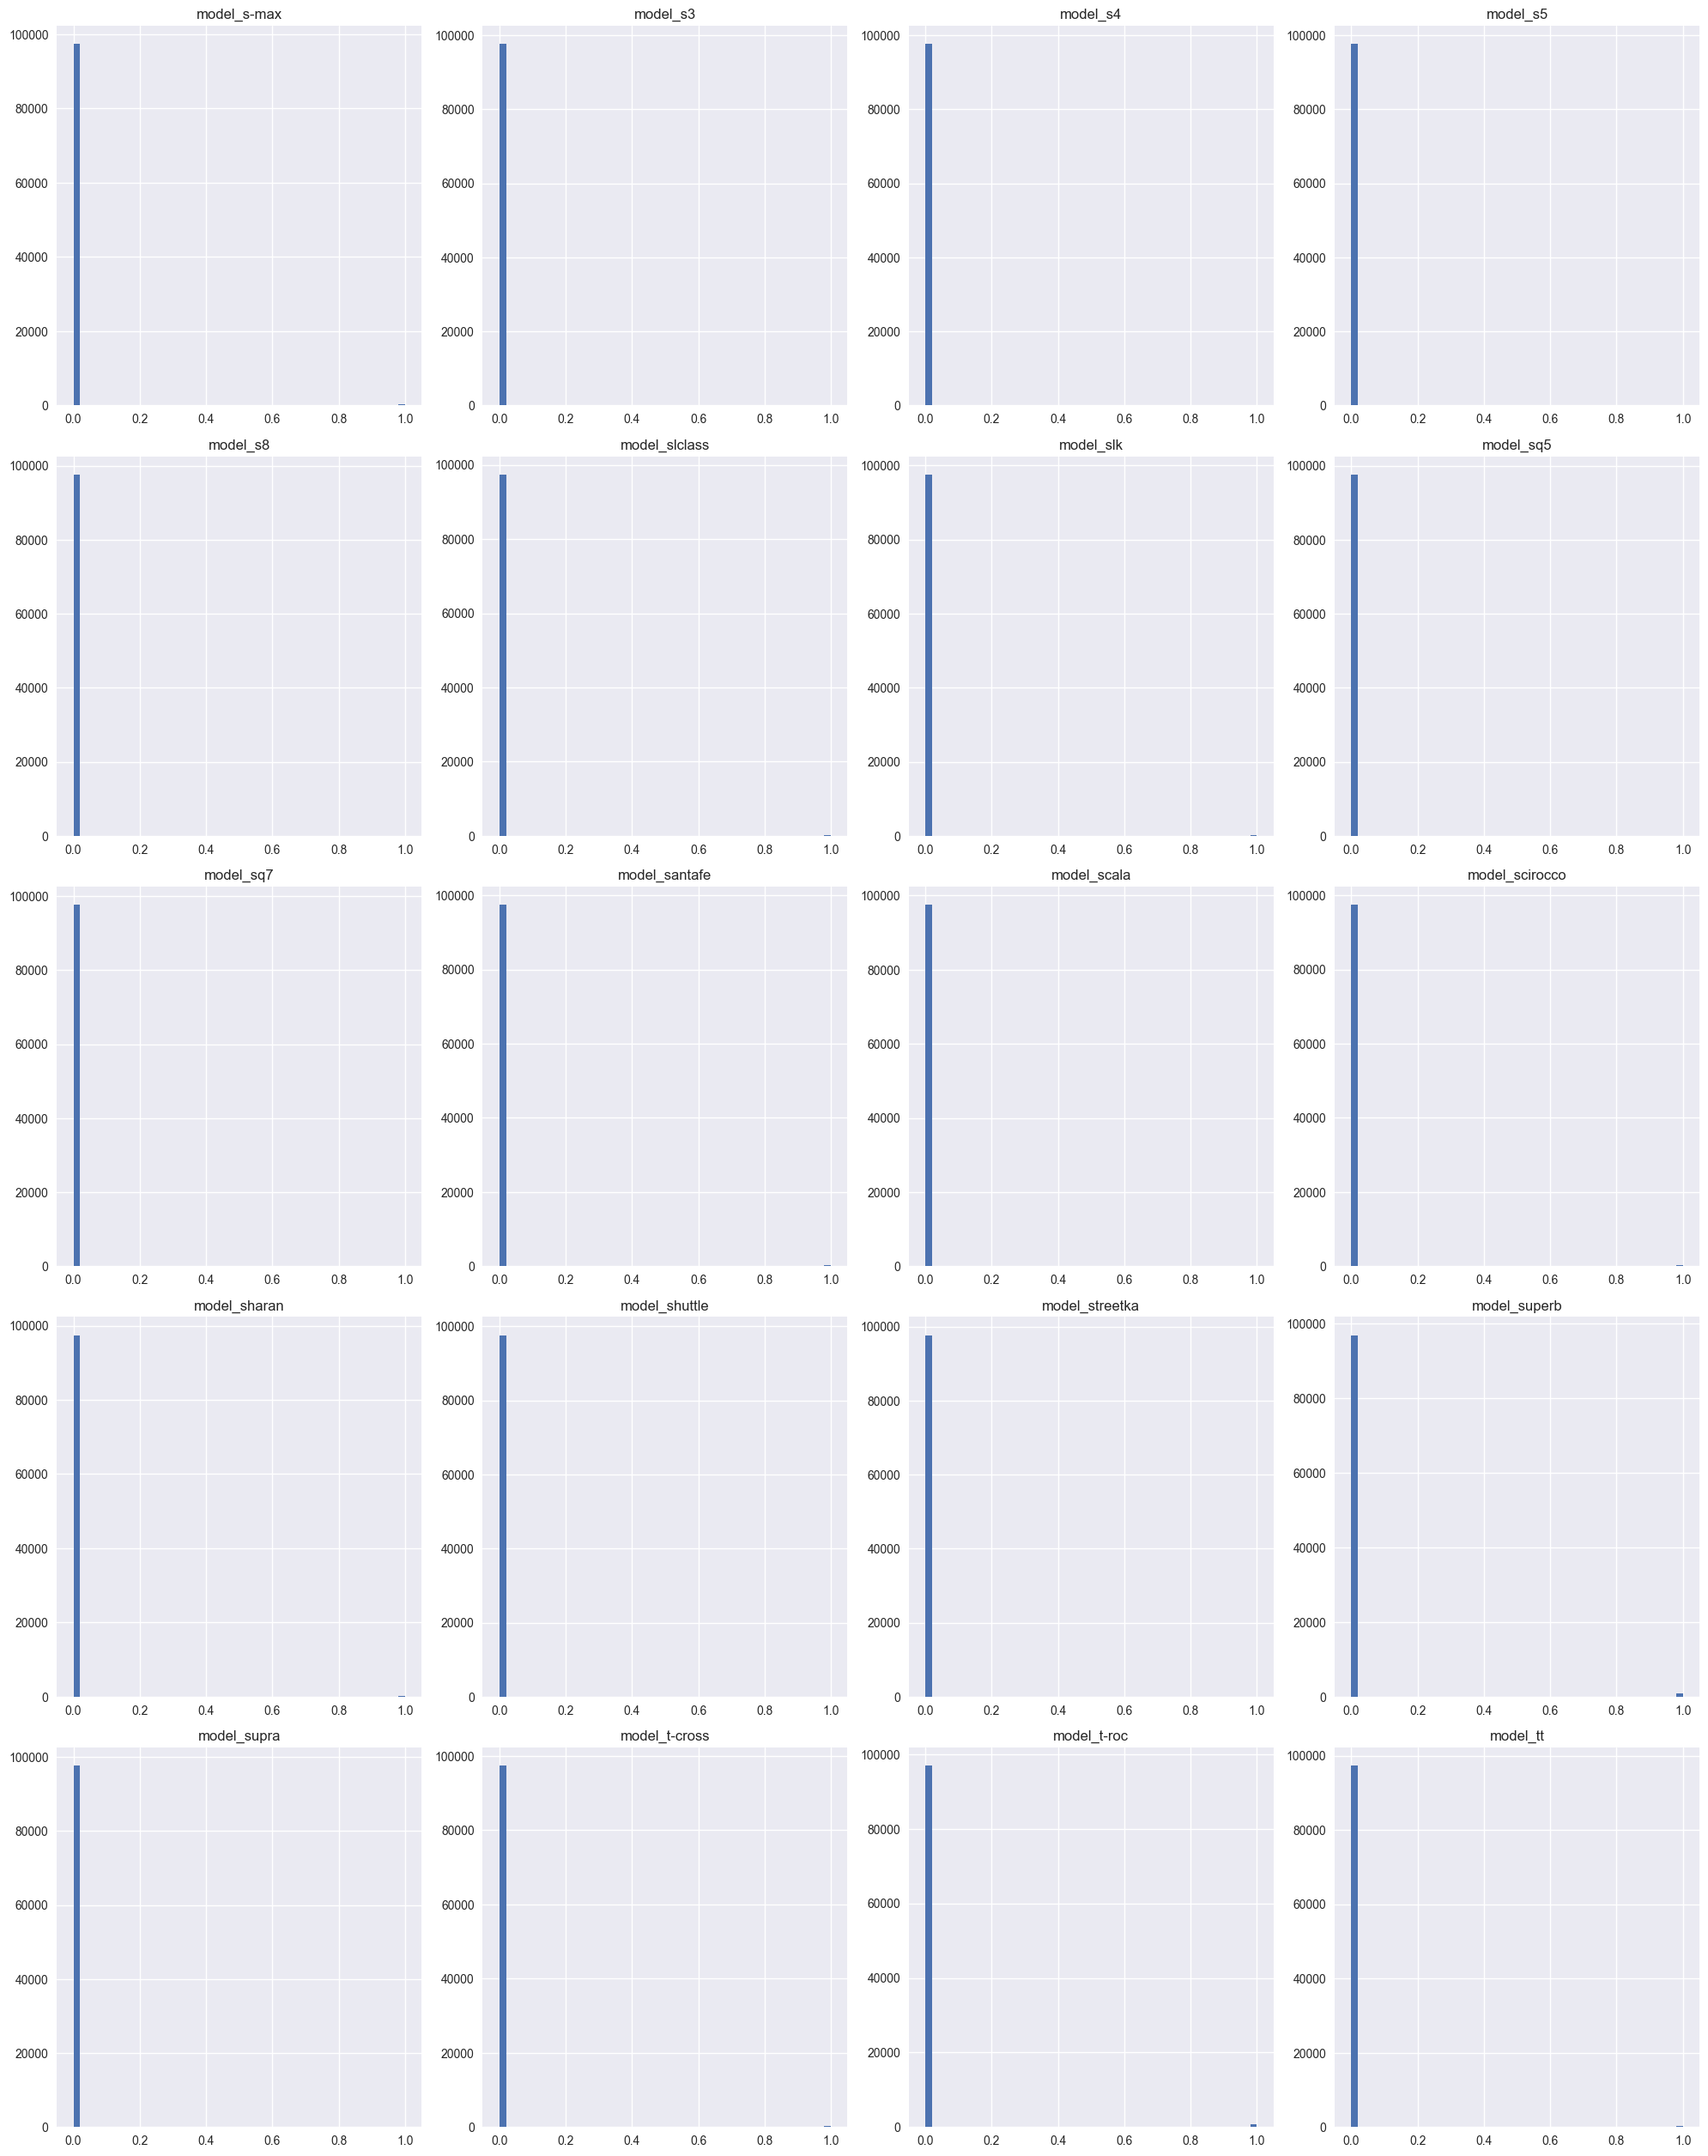

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


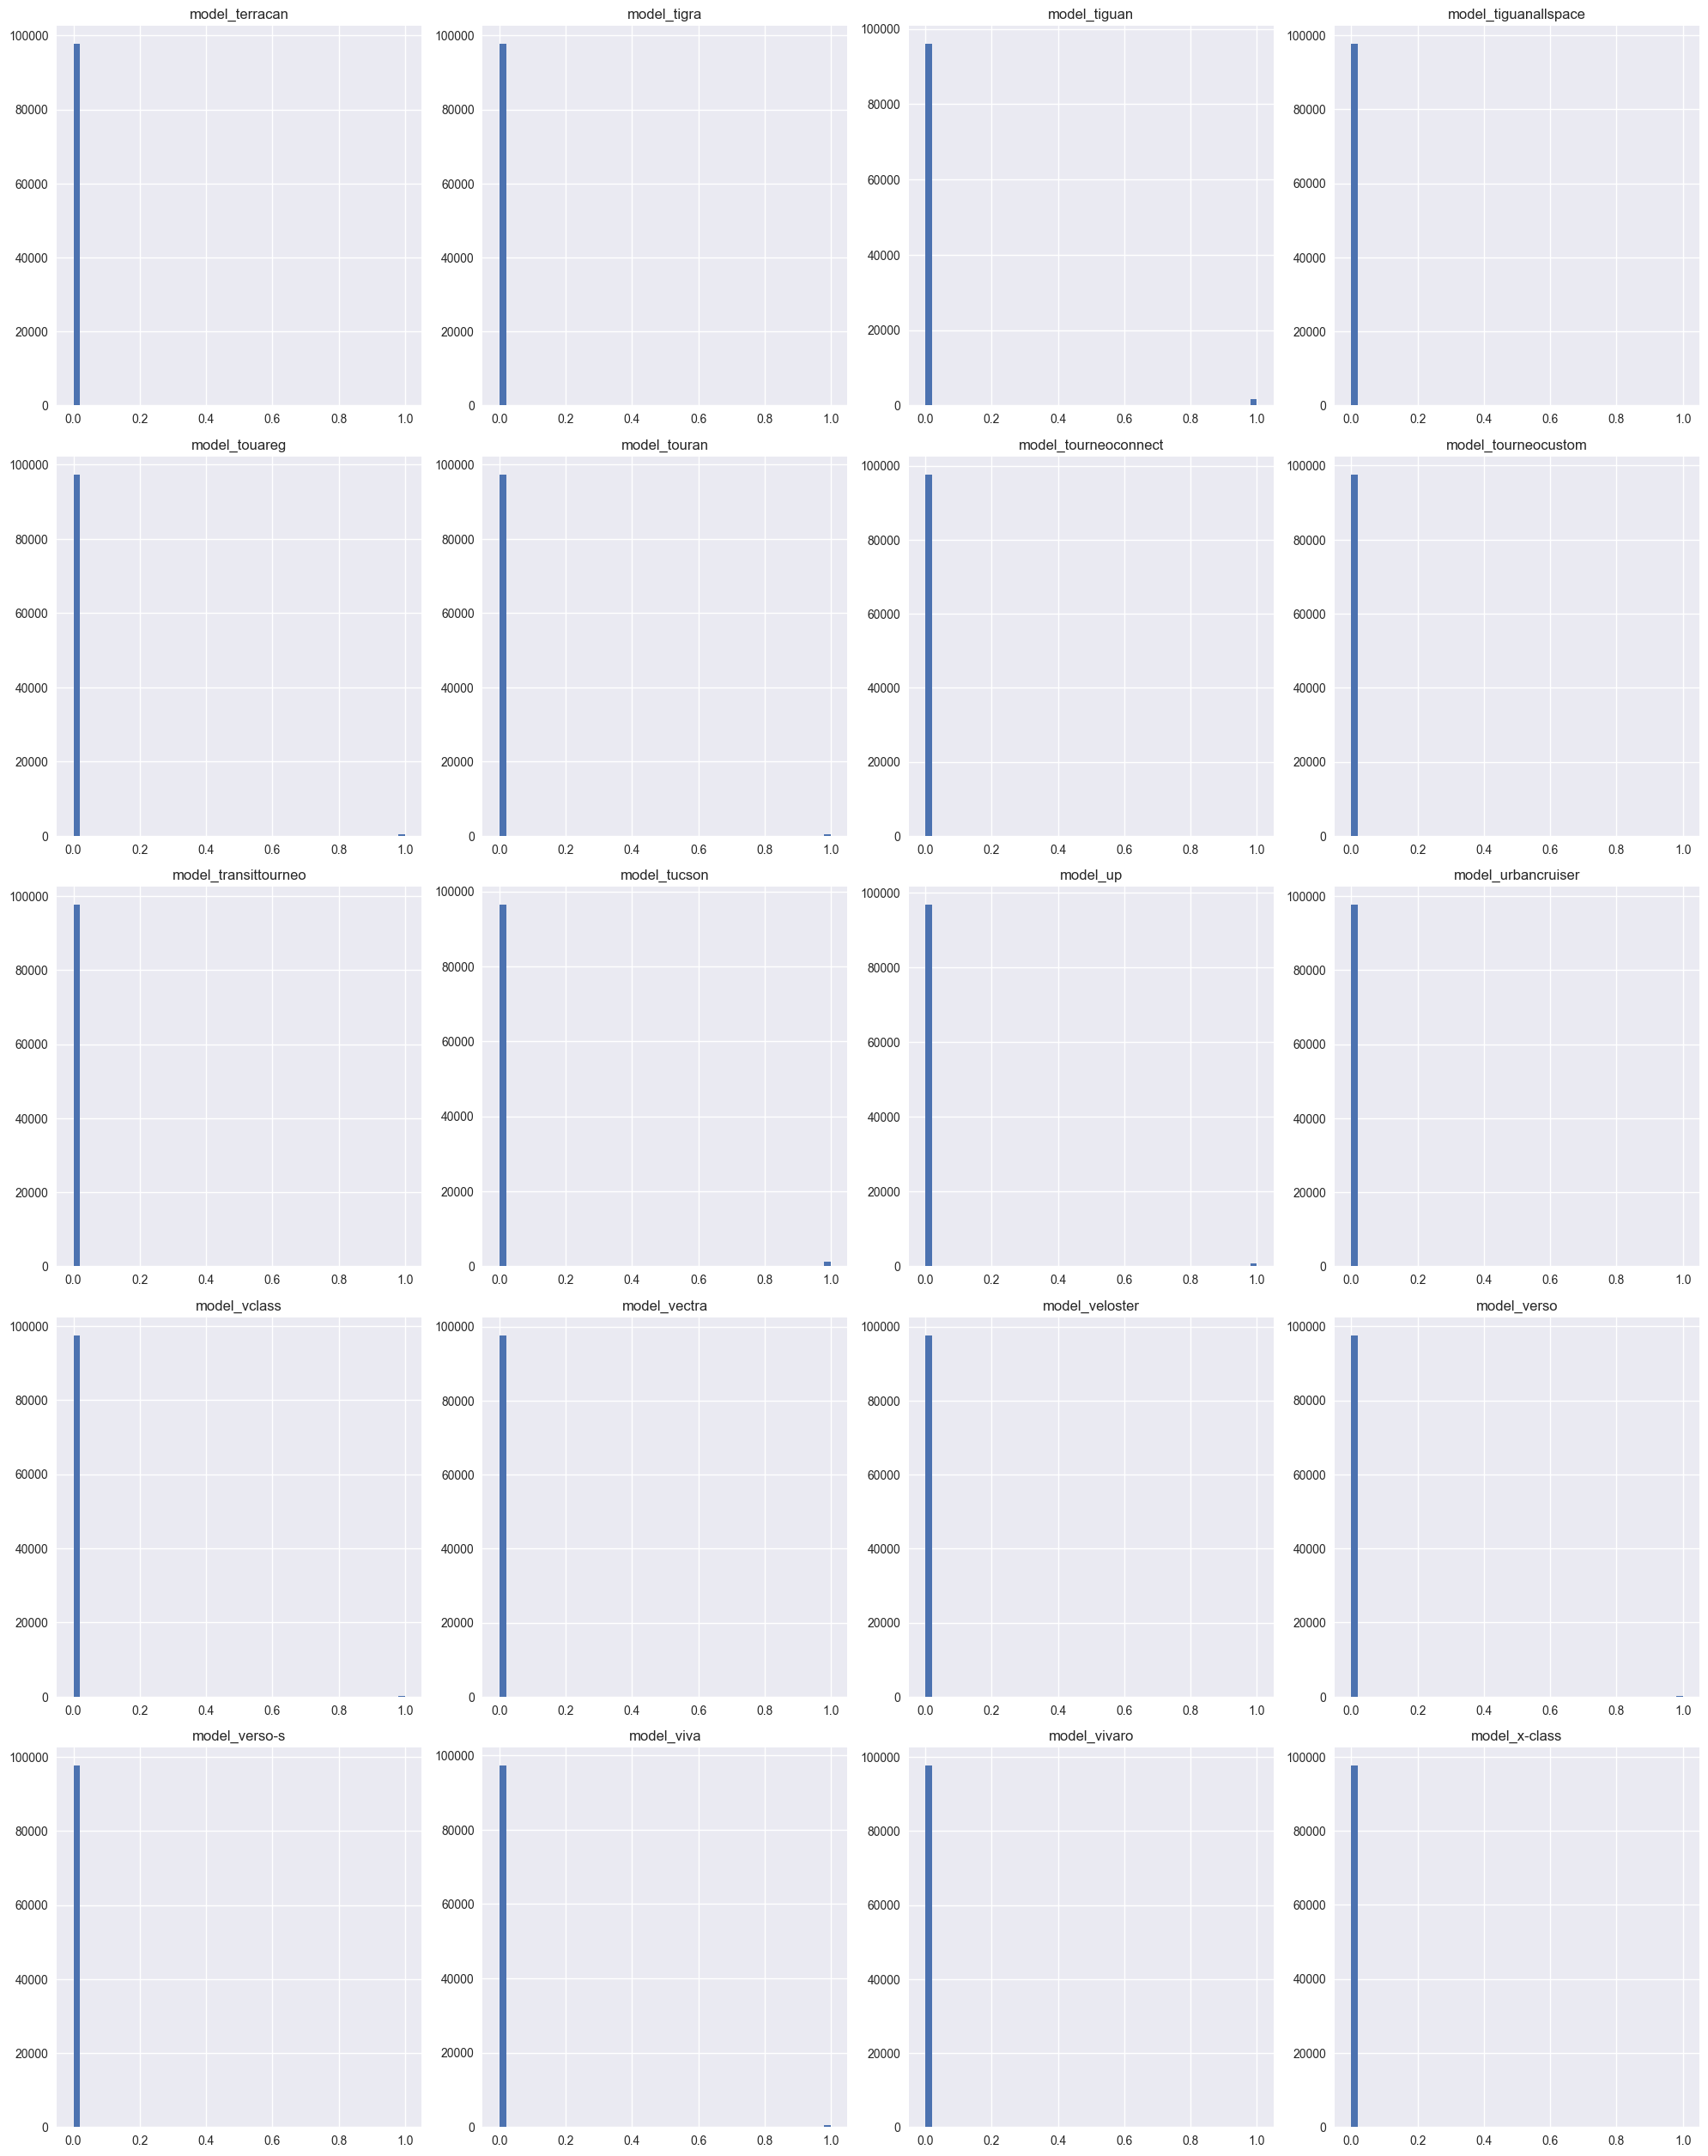

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


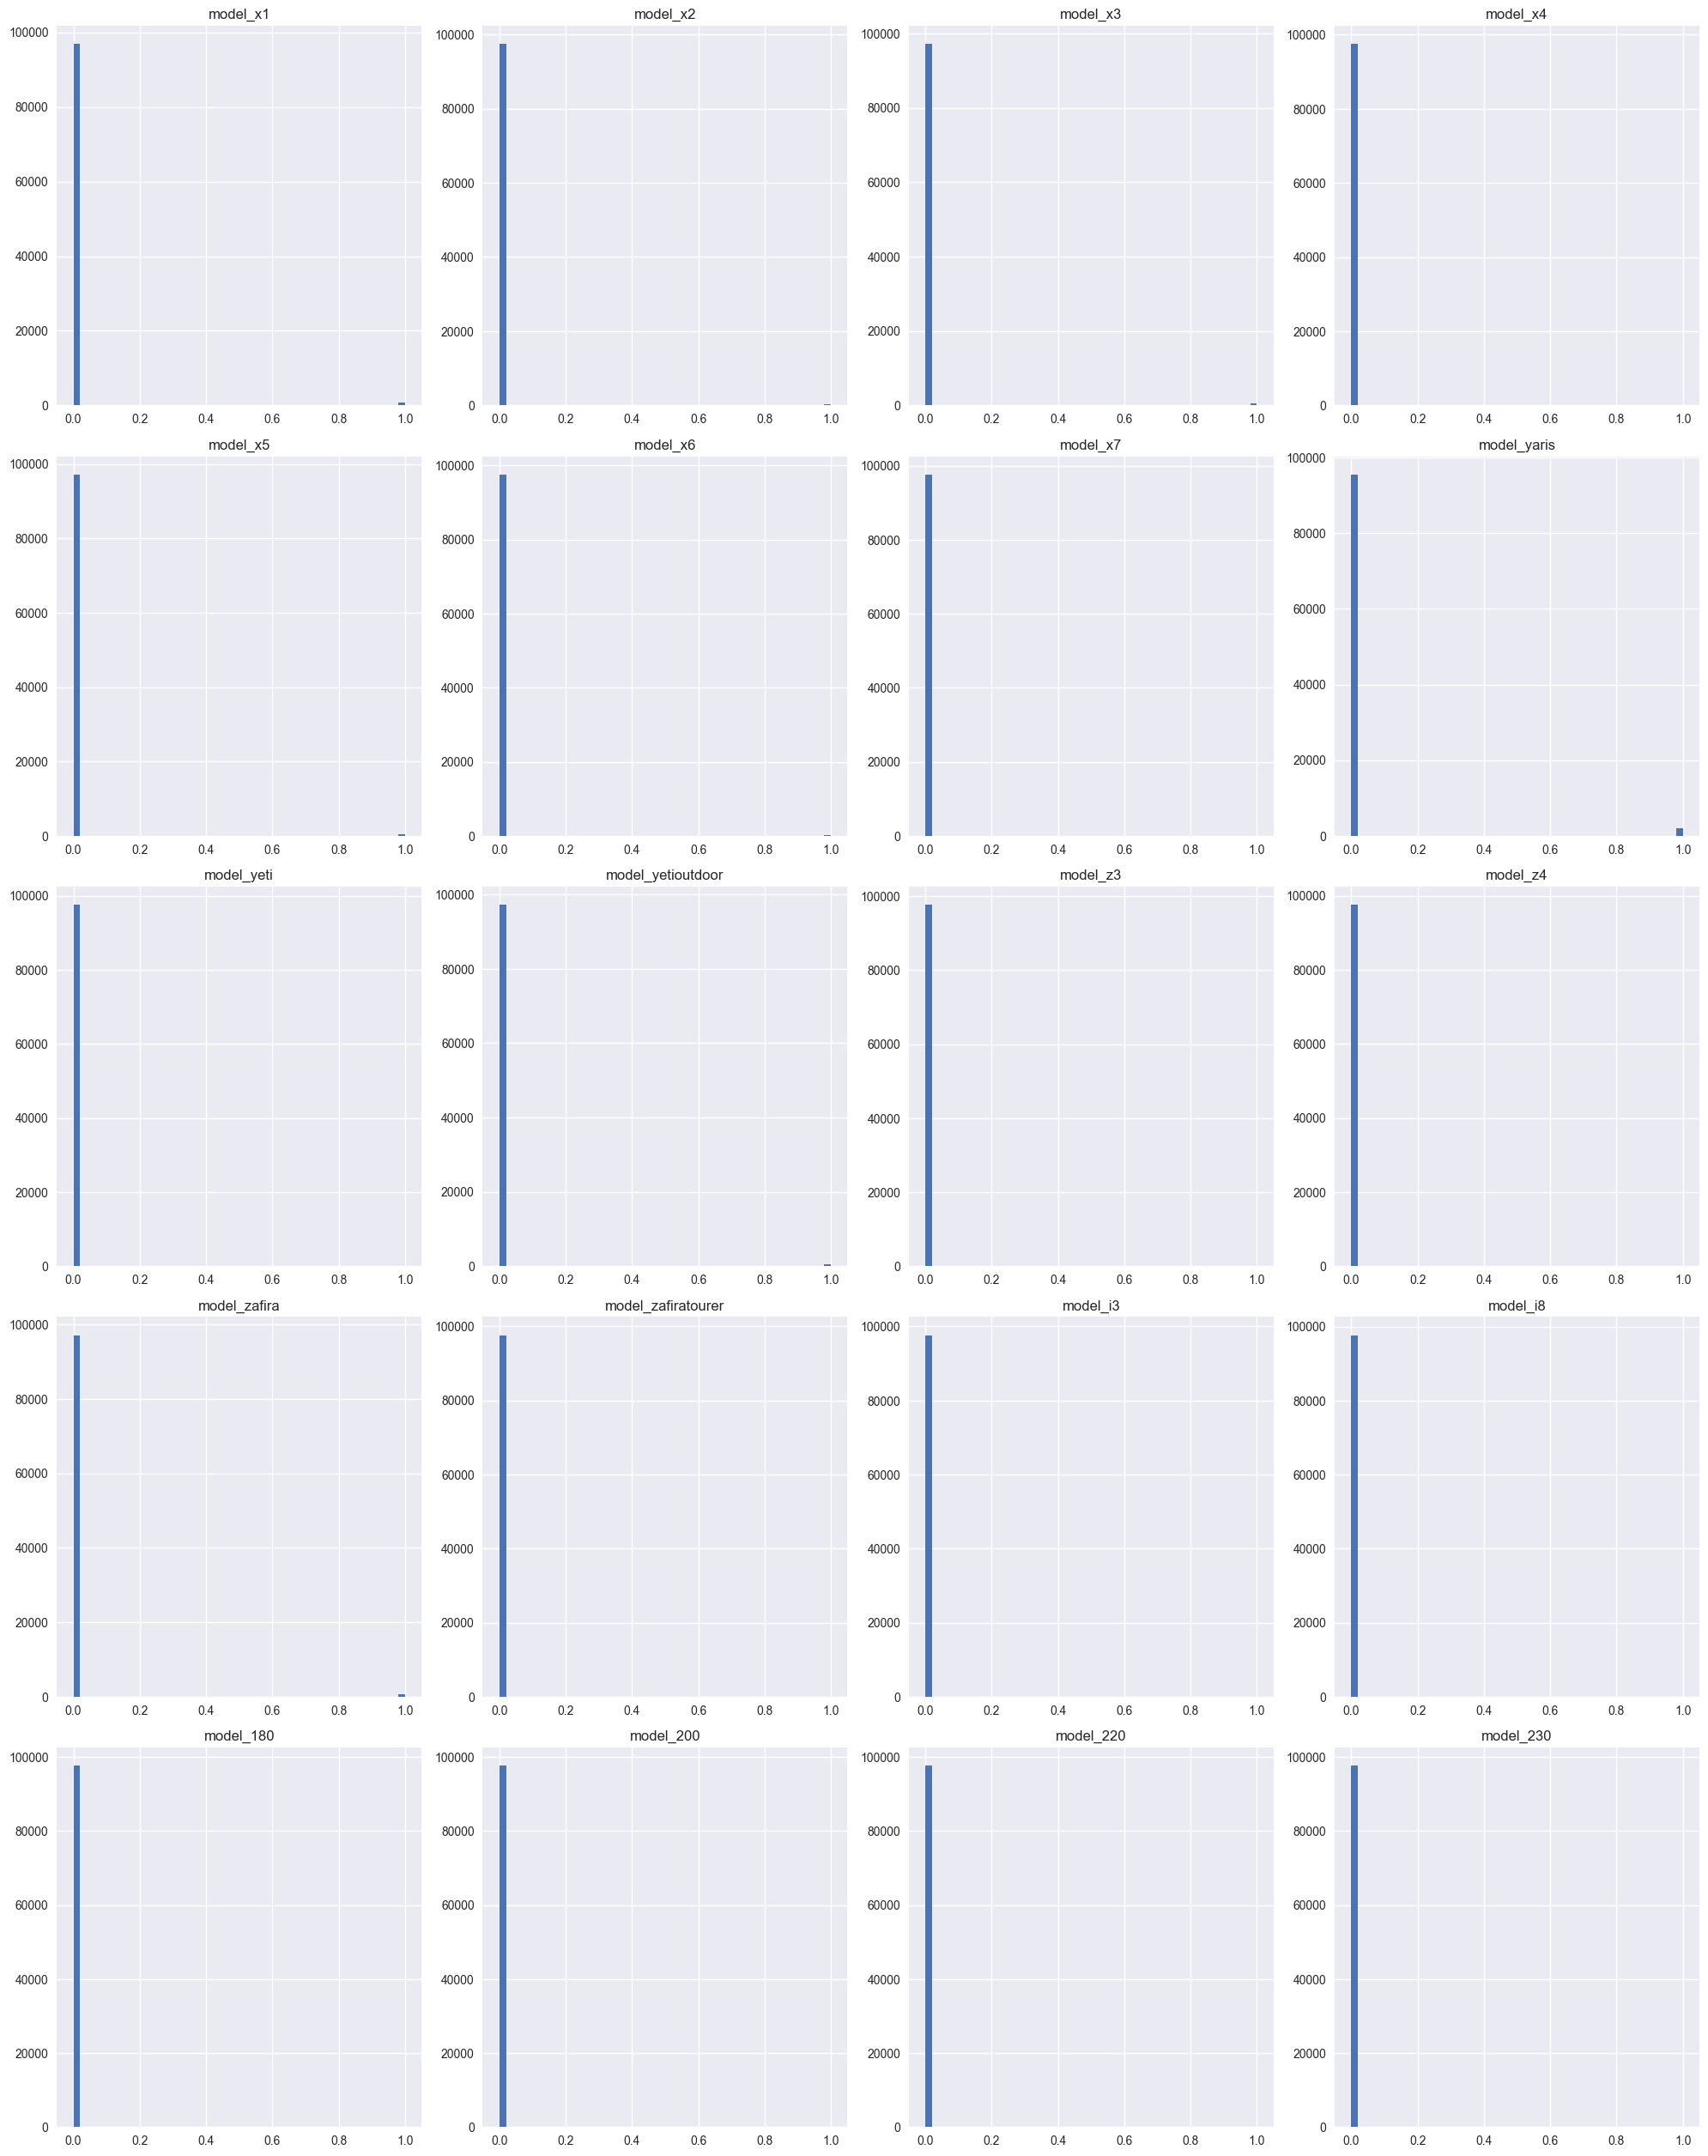

/var/folders/d3/98d2b4cx25d5djc40sr477nm0000gn/T/ipykernel_10600/1637130328.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


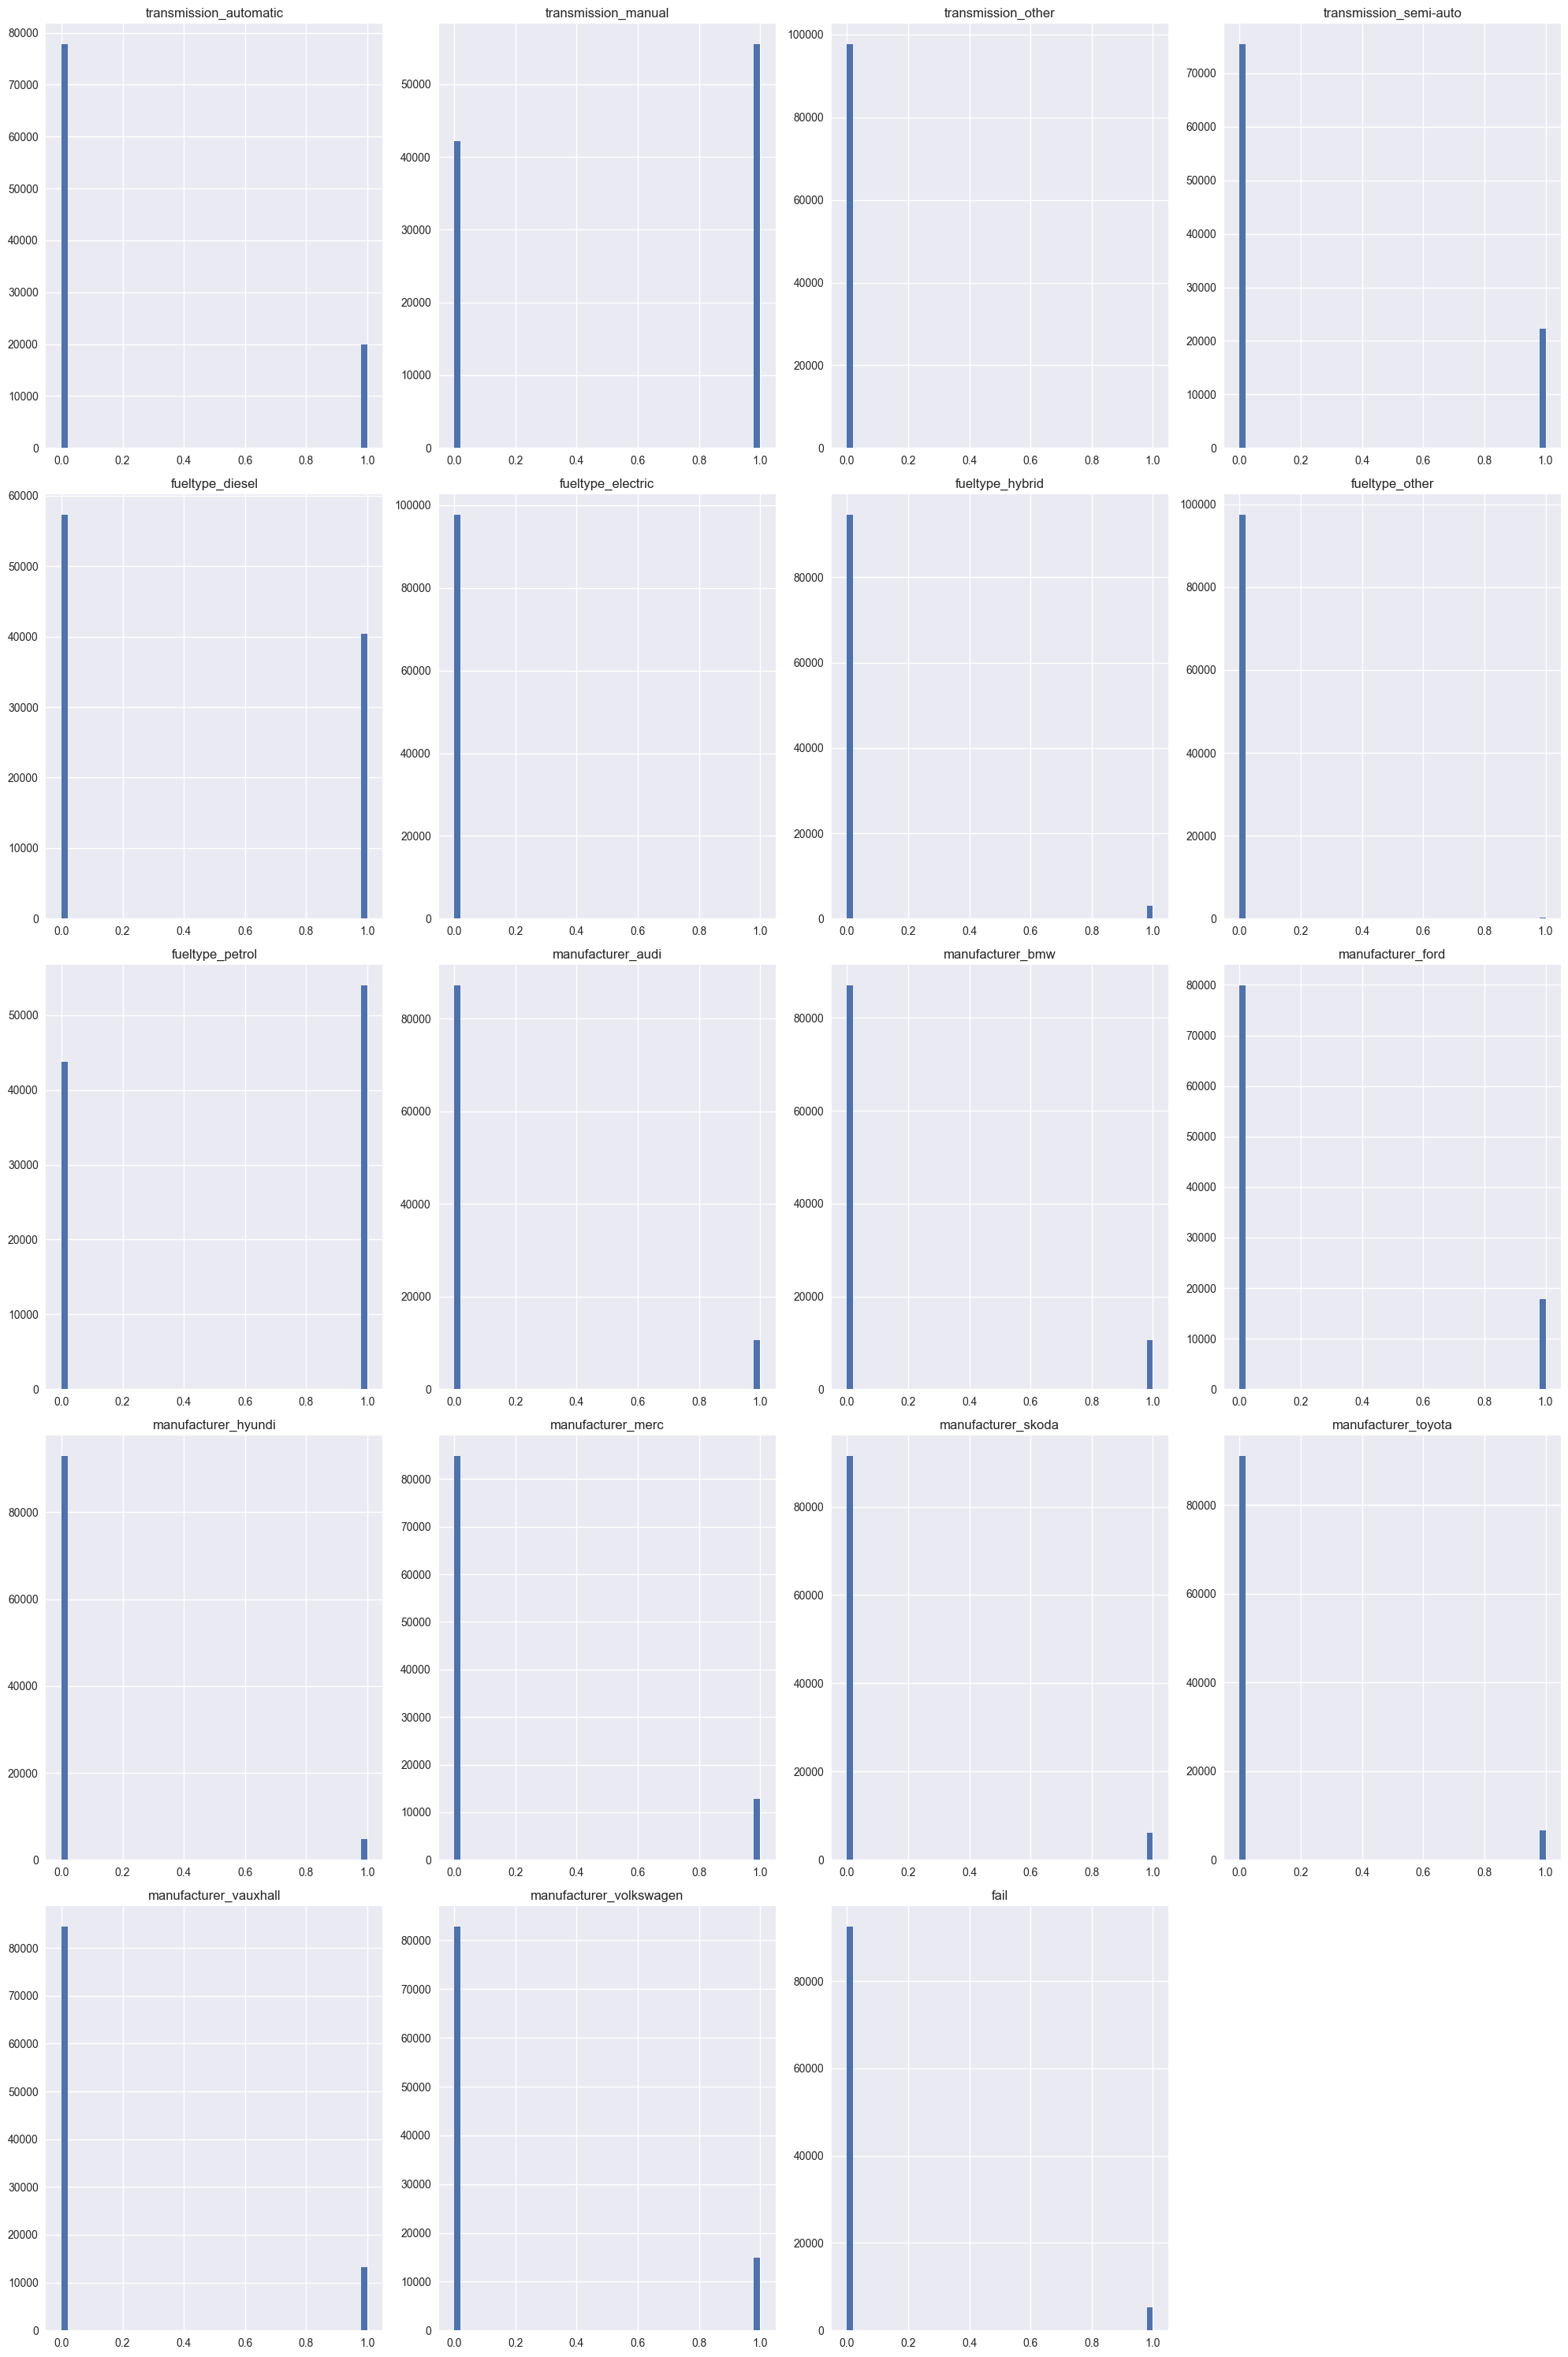

In [66]:
# Function to plot histograms for a given list of columns
import os

# Define the directory to save the visualizations
save_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualizations"

# Ensure the directory exists, creating it if necessary
os.makedirs(save_path, exist_ok=True)

# Function to plot histograms for a given list of columns
def plot_histograms(columns, df, fig_num):
    plt.style.use("seaborn")
    fig, axes = plt.subplots(nrows=len(columns)//4 + 1, ncols=4, figsize=(20, 30))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        df[col].hist(bins=50, ax=axes[i])
        axes[i].set_title(col)
    
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    file_name = f"histograms_part_{fig_num}.png"
    file_path = os.path.join(save_path, file_name)  # Full file path
    plt.savefig(file_path)
    plt.show()

# Split columns into groups of 20 for plotting
columns = df.columns
num_columns = len(columns)
group_size = 20

for i in range(0, num_columns, group_size):
    plot_histograms(columns[i:i+group_size], df, i//group_size + 1)

In [67]:
df.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'enginesize', 'model_1series',
       'model_2series', 'model_3series', 'model_4series',
       ...
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_ford',
       'manufacturer_hyundi', 'manufacturer_merc', 'manufacturer_skoda',
       'manufacturer_toyota', 'manufacturer_vauxhall',
       'manufacturer_volkswagen', 'fail'],
      dtype='object', length=219)

In [68]:
# Map the values in the "Fail" column
df["fail"] = df["fail"].map({0: "Not Failed", 1: "Failed"})

# Calculate the percentage for the pie chart
fail_percentage = df["fail"].value_counts(normalize=True) * 100
print(fail_percentage)

fail
Not Failed    94.622974
Failed         5.377026
Name: proportion, dtype: float64


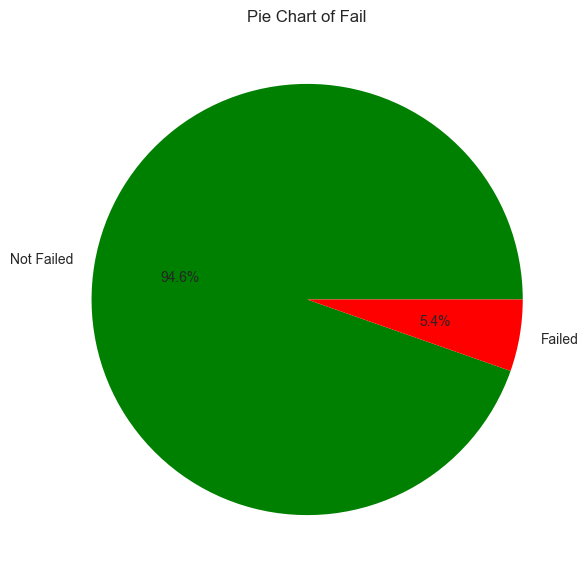

In [69]:
# Data
fail_percentage = [94.622974, 5.377026]
fail_labels = ["Not Failed", "Failed"]

# Colors for each category
colors = ['green', 'red']

# Plot pie chart
plt.figure(figsize=(12, 7))
plt.pie(fail_percentage, labels=fail_labels, autopct="%1.1f%%", colors=colors)
plt.title("Pie Chart of Fail")

# Define the directory to save the visualizations
save_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualizations"

# Ensure the directory exists, creating it if necessary
os.makedirs(save_path, exist_ok=True)

# Save the visualization to the specified file path
file_path = os.path.join(save_path, "pie_chart_fail.png")
plt.savefig(file_path)

plt.show()

###  Insights
**Class Imbalance:** The dataset is highly imbalanced, with a significant skew towards the **"Not Failed"** class.

**Distribution:**

**"Not Failed"** (0) instances constitute approximately 94.62% of the data.
**"Failed"** (1) instances constitute approximately 5.38% of the data.
Implications:

The dataset is skewed towards the "No" class, indicating that there are significantly more cars that do not experience failures compared to those that do.
This imbalance can lead to biased model performance. Specifically, the model may become biased towards predicting the "No" class because it is the majority class.
Mitigation:

To address this imbalance, we can employ techniques such as:

**Oversampling:** Increasing the number of "Failed" instances in the training dataset by replicating them.
Undersampling: Decreasing the number of "Not Failed" instances in the training dataset to balance the classes.

**Synthetic Data Generation:** Using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class.
Class Weights: Adjusting the weights assigned to each class during model training to place more emphasis on the minority class.

By using these techniques, we can help ensure that the model does not become biased towards the majority class and can better predict failures.

#### Correlation

In [70]:
print(df['fail'].dtype)

object


In [71]:
# Convert "Fail" column to binary numeric values (0 and 1)
df['fail'] = df['fail'].replace({'Not Failed': 0, 'Failed': 1})

In [72]:
df.corr()

,year,price,mileage,tax,mpg,enginesize,model_1series,model_2series,model_3series,model_4series,...,manufacturer_audi,manufacturer_bmw,manufacturer_ford,manufacturer_hyundi,manufacturer_merc,manufacturer_skoda,manufacturer_toyota,manufacturer_vauxhall,manufacturer_volkswagen,fail
year,1.000000,0.492491,-0.739664,0.192058,-0.130547,-0.035639,-0.031044,0.036275,-0.029534,0.019305,...,0.002962,-0.000607,-0.045912,0.002745,0.037019,0.052866,-0.041452,-0.031592,0.034238,-0.628033
price,0.492491,1.000000,-0.417996,0.307003,-0.295507,0.639356,-0.013963,0.030037,0.049855,0.057994,...,0.214533,0.209946,-0.215470,-0.092915,0.310187,-0.065573,-0.116666,-0.259333,0.001479,-0.229087
mileage,-0.739664,-0.417996,1.000000,-0.215558,0.183070,0.107299,0.032233,-0.029677,0.065999,-0.006165,...,0.028708,0.041406,0.003647,-0.016794,-0.019407,-0.038560,-0.004250,0.013943,-0.020484,0.491556
tax,0.192058,0.307003,-0.215558,1.000000,-0.451370,0.280770,-0.025426,0.012824,0.008430,0.020218,...,0.031692,0.063282,-0.050840,0.003739,0.059611,-0.011047,-0.109590,0.051965,-0.050958,0.047799
mpg,-0.130547,-0.295507,0.183070,-0.451370,1.000000,-0.249346,0.022034,0.005475,0.028519,0.001865,...,-0.093989,0.027632,0.078869,-0.019156,-0.000195,0.022387,0.132001,-0.090509,-0.037554,-0.033438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
manufacturer_skoda,0.052866,-0.065573,-0.038560,-0.011047,0.022387,-0.107063,-0.037221,-0.028847,-0.041560,-0.026253,...,-0.090535,-0.091010,-0.122765,-0.058932,-0.101227,1.000000,-0.070544,-0.103024,-0.110264,-0.029197
manufacturer_toyota,-0.041452,-0.116666,-0.004250,-0.109590,0.132001,-0.093701,-0.038836,-0.030098,-0.043363,-0.027392,...,-0.094463,-0.094959,-0.128092,-0.061489,-0.105619,-0.070544,1.000000,-0.107493,-0.115048,0.010736
manufacturer_vauxhall,-0.031592,-0.259333,0.013943,0.051965,-0.090509,-0.173841,-0.056716,-0.043956,-0.063328,-0.040003,...,-0.137955,-0.138679,-0.187067,-0.089799,-0.154248,-0.103024,-0.107493,1.000000,-0.168018,0.001472
manufacturer_volkswagen,0.034238,0.001479,-0.020484,-0.050958,-0.037554,-0.048914,-0.060702,-0.047045,-0.067778,-0.042815,...,-0.147650,-0.148425,-0.200214,-0.096110,-0.165088,-0.110264,-0.115048,-0.168018,1.000000,-0.018910


##### **Pair Plot for a Subset of Features**

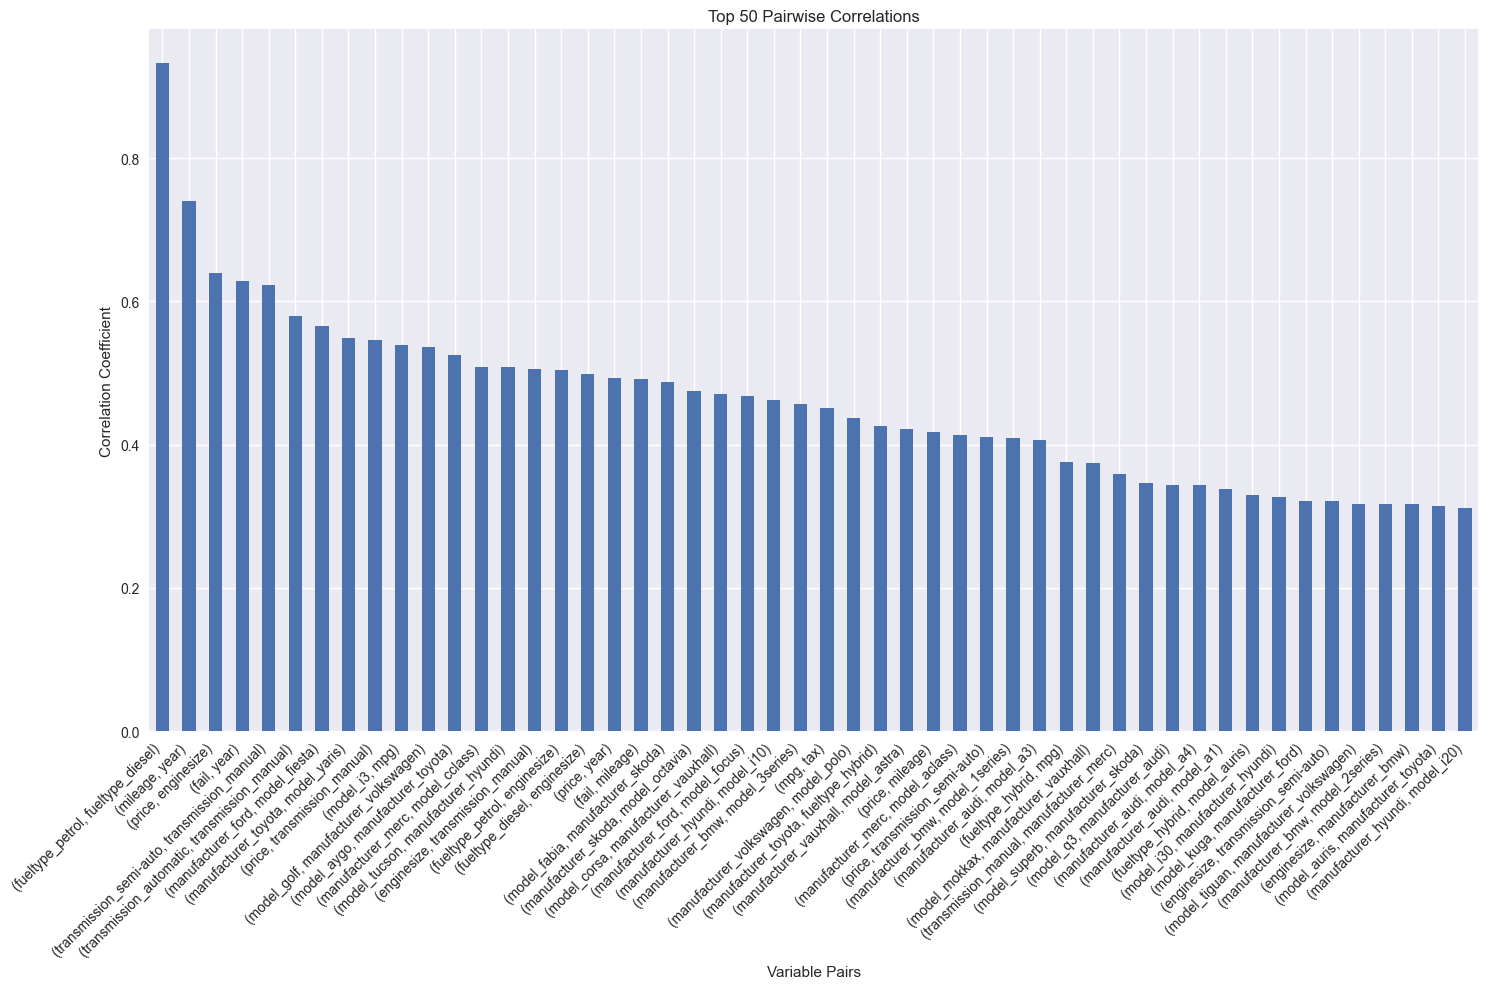

In [73]:
# Define the path where you want to save the visualizations
save_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualizations"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Compute the correlation matrix and unstack it
cor = df.corr().unstack()

# Sort the correlation values by absolute value
cor_sorted = cor.abs().sort_values(ascending=False)

# Remove self-correlations (correlation of a variable with itself)
cor_sorted = cor_sorted[cor_sorted < 1]

# Drop duplicate pairs
cor_sorted = cor_sorted.drop_duplicates()

# Select the top N correlations in this case 50
top_n = 50  # Adjust as needed
top_correlations = cor_sorted.head(top_n)

# Create a bar plot for the top correlations
plt.figure(figsize=(15, 10))
top_correlations.plot(kind='bar')
plt.title(f'Top {top_n} Pairwise Correlations')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variable Pairs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the bar plot
bar_plot_path = os.path.join(save_path, "top_correlations_bar_plot.png")
plt.savefig(bar_plot_path)
plt.show()

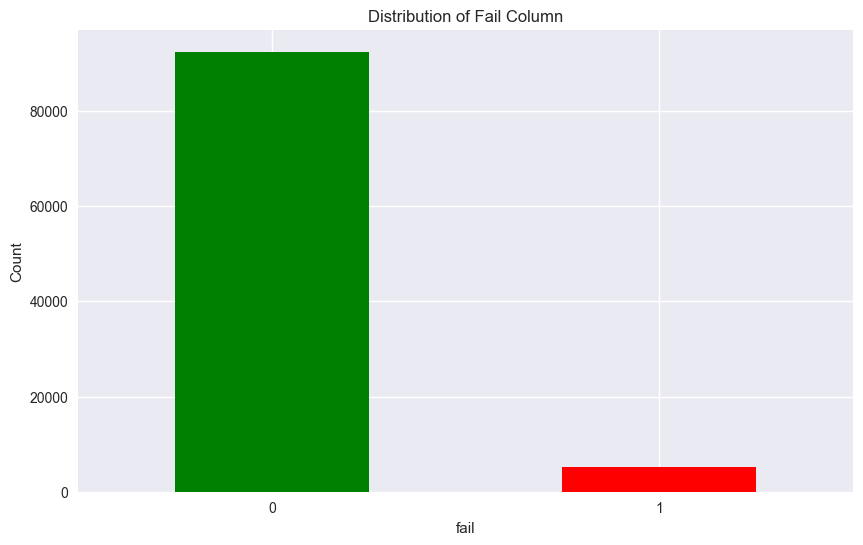

In [74]:
# Plot histogram for the 'Fail' column with custom colors
plt.figure(figsize=(10, 6))
df['fail'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Fail Column')
plt.xlabel('fail')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Save the histogram
histogram_path = os.path.join(save_path, "fail_distribution_histogram.png")
plt.savefig(histogram_path)
plt.show()

In [75]:
df.head()

,year,price,mileage,tax,mpg,enginesize,model_1series,model_2series,model_3series,model_4series,...,manufacturer_audi,manufacturer_bmw,manufacturer_ford,manufacturer_hyundi,manufacturer_merc,manufacturer_skoda,manufacturer_toyota,manufacturer_vauxhall,manufacturer_volkswagen,fail
0,2017,7495,11630,145,60.1,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2017,10989,9200,145,58.9,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019,27990,1614,145,49.6,2.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2017,12495,30960,150,62.8,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2017,7999,19353,125,54.3,1.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### **Yearly failed analysis**

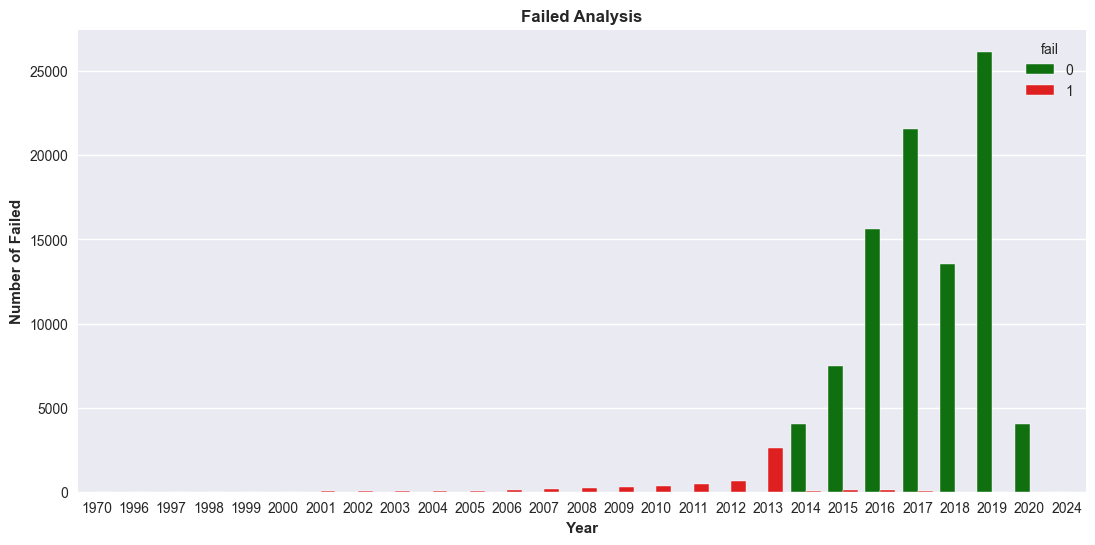

In [76]:
# Create a countplot with custom colors for 'Fail' column
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")

# Define the palette with specific colors for each hue level
palette = {0: 'green', 1: 'red'}

sns.countplot(x="year", hue="fail", data=df, palette=palette)
plt.ylabel("Number of Failed", weight="bold")
plt.xlabel("Year", weight="bold")
plt.title("Failed Analysis", weight="bold")

# Save the plot to the specified path
save_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/visualizations"
countplot_path = os.path.join(save_path, "failed_analysis_countplot.png")
plt.savefig(countplot_path)
plt.show()

#####  Insights

- It is observed that the highest (3) failed years are 2013, 2012, 2011 respectively

In [77]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
df.head()

,year,price,mileage,tax,mpg,enginesize,model_1series,model_2series,model_3series,model_4series,model_5series,model_6series,model_7series,model_8series,model_aclass,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a7,model_a8,model_accent,model_adam,model_agila,model_amarok,model_amica,model_ampera,model_antara,model_arteon,model_astra,model_auris,model_avensis,model_aygo,model_bclass,model_b-max,model_beetle,model_cclass,model_c-hr,model_c-max,model_cc,model_clclass,model_claclass,model_clcclass,model_clk,model_clsclass,model_caddy,model_caddylife,model_caddymaxi,model_caddymaxilife,model_california,model_camry,model_caravelle,model_cascada,model_citigo,model_combolife,model_corolla,model_corsa,model_crosslandx,model_ecosport,model_edge,model_eos,model_escort,model_fabia,model_fiesta,model_focus,model_fox,model_fusion,model_gclass,model_glclass,model_glaclass,model_glbclass,model_glcclass,model_gleclass,model_glsclass,model_gt86,model_gtc,model_galaxy,model_getz,model_golf,model_golfsv,model_grandc-max,model_grandtourneoconnect,model_grandlandx,model_hilux,model_i10,model_i20,model_i30,model_i40,model_i800,model_iq,model_ix20,model_ix35,model_insignia,model_ioniq,model_jetta,model_ka,model_ka+,model_kadjar,model_kamiq,model_karoq,model_kodiaq,model_kona,model_kuga,model_landcruiser,model_mclass,model_m2,model_m3,model_m4,model_m5,model_m6,model_meriva,model_mokka,model_mokkax,model_mondeo,model_mustang,model_octavia,model_proaceverso,model_passat,model_polo,model_prius,model_puma,model_q2,model_q3,model_q5,model_q7,model_q8,model_rclass,model_r8,model_rav4,model_rs3,model_rs4,model_rs5,model_rs6,model_rs7,model_ranger,model_rapid,model_roomster,model_sclass,model_s-max,model_s3,model_s4,model_s5,model_s8,model_slclass,model_slk,model_sq5,model_sq7,model_santafe,model_scala,model_scirocco,model_sharan,model_shuttle,model_streetka,model_superb,model_supra,model_t-cross,model_t-roc,model_tt,model_terracan,model_tigra,model_tiguan,model_tiguanallspace,model_touareg,model_touran,model_tourneoconnect,model_tourneocustom,model_transittourneo,model_tucson,model_up,model_urbancruiser,model_vclass,model_vectra,model_veloster,model_verso,model_verso-s,model_viva,model_vivaro,model_x-class,model_x1,model_x2,model_x3,model_x4,model_x5,model_x6,model_x7,model_yaris,model_yeti,model_yetioutdoor,model_z3,model_z4,model_zafira,model_zafiratourer,model_i3,model_i8,model_180,model_200,model_220,model_230,transmission_automatic,transmission_manual,transmission_other,transmission_semi-auto,fueltype_diesel,fueltype_electric,fueltype_hybrid,fueltype_other,fueltype_petrol,manufacturer_audi,manufacturer_bmw,manufacturer_ford,manufacturer_hyundi,manufacturer_merc,manufacturer_skoda,manufacturer_toyota,manufacturer_vauxhall,manufacturer_volkswagen,fail
0,2017,7495,11630,145,60.1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,2017,10989,9200,145,58.9,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2019,27990,1614,145,49.6,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [78]:
df.shape

(97712, 219)

In [79]:
for column in df.columns:
    print(f"{column}: {df[column].dtypes}")

year: int64
price: int64
mileage: int64
tax: int64
mpg: float64
enginesize: float64
model_1series: int64
model_2series: int64
model_3series: int64
model_4series: int64
model_5series: int64
model_6series: int64
model_7series: int64
model_8series: int64
model_aclass: int64
model_a1: int64
model_a2: int64
model_a3: int64
model_a4: int64
model_a5: int64
model_a6: int64
model_a7: int64
model_a8: int64
model_accent: int64
model_adam: int64
model_agila: int64
model_amarok: int64
model_amica: int64
model_ampera: int64
model_antara: int64
model_arteon: int64
model_astra: int64
model_auris: int64
model_avensis: int64
model_aygo: int64
model_bclass: int64
model_b-max: int64
model_beetle: int64
model_cclass: int64
model_c-hr: int64
model_c-max: int64
model_cc: int64
model_clclass: int64
model_claclass: int64
model_clcclass: int64
model_clk: int64
model_clsclass: int64
model_caddy: int64
model_caddylife: int64
model_caddymaxi: int64
model_caddymaxilife: int64
model_california: int64
model_camry: in

Column 'model_EClass' is duplicated (appears 2 times).

In [80]:
# Save the DataFrame to a CSV file
output_file_path = "/Users/kanayojustice/Documents/Data_scientist_projects/AutoPredict/research/data/auto_pred_cleaned_data.csv"
df.to_csv(output_file_path, index=False)